# BetGuider

In [19]:
from Historical_Data.get_historical_games import get_historical_data
import feature_engineering as FE
import pandas as pd
import numpy as np
from datetime import date, timedelta 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import poisson
import xgboost as xgb
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
import optuna

## Get Historical Data

In [2]:
#df_hist = get_historical_data(seasons=[19,20])
df_hist = pd.read_csv('historical_data.csv')
df_hist['Date'] = pd.to_datetime(df_hist['Date'])

In [4]:
df_hist.dtypes

Unnamed: 0                               int64
Div                                     object
League                                  object
Season                                   int64
Date                            datetime64[ns]
Hour                                    object
Home Team                               object
Away Team                               object
Home Goals                             float64
Away Goals                             float64
Home Shots Target                      float64
Away Shots Target                      float64
Home Corners                           float64
Away Corners                           float64
More_2.5                                  bool
BTS                                       bool
Home_Team_Promoted_Relegated              bool
Away_Team_Promoted_Relegated              bool
Home Team Win                             bool
Draw                                      bool
Away Team Win                             bool
dtype: object

In [6]:
df_hist.head()

Unnamed: 0  Div           League  Season       Date   Hour   Home Team  \
0           0  SP1  Spanish La Liga      19 2019-08-16  20:00  ath bilbao   
1           1  SP1  Spanish La Liga      19 2019-08-17  16:00       celta   
2           2  SP1  Spanish La Liga      19 2019-08-17  18:00    valencia   
3           3  SP1  Spanish La Liga      19 2019-08-17  19:00    mallorca   
4           4  SP1  Spanish La Liga      19 2019-08-17  20:00     leganes   

     Away Team  Home Goals  Away Goals  Home Shots Target  Away Shots Target  \
0    barcelona         1.0         0.0                5.0                2.0   
1  real madrid         1.0         3.0                4.0               11.0   
2     sociedad         1.0         1.0                6.0                3.0   
3        eibar         2.0         1.0                4.0                5.0   
4      osasuna         0.0         1.0                2.0                2.0   

   Home Corners  Away Corners  More_2.5    BTS  Home_Team_Promoted_Relegated  \
0           3.0           8.0     False  False                         False   
1           6.0           4.0      True   True                         False   
2           3.0           3.0     False   True                         False   
3           9.0           3.0      True   True                         False   
4           8.0           0.0     False  False                         False   

   Away_Team_Promoted_Relegated  Home Team Win   Draw  Away Team Win  
0                         False           True  False          False  
1                         False          False  False           True  
2                         False          False   True          False  
3                         False           True  False          False  
4                         False          False  False           True

In [7]:
df_hist['Season'].unique()

array([19, 20, 21])

In [8]:
df_hist.columns

Index(['Unnamed: 0', 'Div', 'League', 'Season', 'Date', 'Hour', 'Home Team',
       'Away Team', 'Home Goals', 'Away Goals', 'Home Shots Target',
       'Away Shots Target', 'Home Corners', 'Away Corners', 'More_2.5', 'BTS',
       'Home_Team_Promoted_Relegated', 'Away_Team_Promoted_Relegated',
       'Home Team Win', 'Draw', 'Away Team Win'],
      dtype='object')

In [9]:
df_hist.League.unique()

array(['Spanish La Liga', 'Spanish Segunda Division', 'German Bundesliga',
       'German Bundesliga 2', 'Italian Serie A', 'Italian Serie B',
       'English Premier League', 'English Championship',
       'English League 1', 'English League 2', 'Scotish Premier League',
       'Scotish Division 1', 'Scotish Division 2', 'Scotish Division 3',
       'French Ligue 1', 'French Ligue 2', 'Dutch Eredivisie',
       'Belgian First Division A', 'Portuguese Primeira Liga',
       'Turkish Super League', 'Greek Super League', 'Liga Profesional',
       'Bundesliga', 'Superliga', 'Liga MX', 'Ekstraklasa', 'Liga 1',
       'Premier League', 'Super League', 'Challenge League'], dtype=object)

In [10]:
df_hist.Div.unique()

array(['SP1', 'SP2', 'D1', 'D2', 'I1', 'I2', 'E0', 'E1', 'E2', 'E3',
       'SC0', 'SC1', 'SC2', 'SC3', 'F1', 'F2', 'N1', 'B1', 'P1', 'T1',
       'G1', 'ARG', 'AUT', 'DNK', 'MEX', 'POL', 'ROU', 'RUS', 'SWZ'],
      dtype=object)

In [11]:
df_hist.shape

(18585, 21)

In [5]:
df_hist.groupby('Div').sum()['Home Shots Target']

Div
ARG       0.0
AUT       0.0
B1     2594.0
D1     3083.0
D2     3025.0
DNK       0.0
E0     3458.0
E1     4509.0
E2     4001.0
E3     4126.0
F1     2944.0
F2     2590.0
G1     1973.0
I1     4499.0
I2     3401.0
MEX       0.0
N1     2801.0
P1     2543.0
POL       0.0
ROU       0.0
RUS       0.0
SC0    1717.0
SC1    1197.0
SC2    1114.0
SC3    1094.0
SP1    3160.0
SP2    3483.0
SWZ       0.0
T1     3513.0
Name: Home Shots Target, dtype: float64

In [4]:
df_hist.isna().sum()

Unnamed: 0                         0
Div                                0
League                             0
Season                             0
Date                               0
Hour                               0
Home Team                          0
Away Team                          0
Home Goals                         0
Away Goals                         0
Home Shots Target               4964
Away Shots Target               4964
Home Corners                    4964
Away Corners                    4964
More_2.5                           0
BTS                                0
Home_Team_Promoted_Relegated       0
Away_Team_Promoted_Relegated       0
Home Team Win                      0
Draw                               0
Away Team Win                      0
dtype: int64

- The Historical Data consists of 18585 football matches

**Dataset: all the games of the season 20/21 played after 1 January 2021 (excluding games with promoted or relegated teams) for the following leagues:**
1. Spanish First and Second Division
2. German First and Second Division
3. Italian First and Second Division
4. English First, Second and Third Division
5. French First and Second Division
6. Portuguese First Division
7. Scottish  First, Seconda and Third Division
8. Belgian First Division
9. Greek First Division
10. Turkish First Division

In [7]:
#Leagues of the dataset
divs = ['SP1', 'SP2', 'D1', 'D2', 'I1', 'I2', 'E0', 'E1', 'E2', 'E3', 'F1', 'F2', 'P1', 'SC0', 'SC1', 'SC2',
        'SC3', 'B1', 'G1', 'T1']

df_test = df_hist.query('Div in @divs and Date > "2021-01-01" and Home_Team_Promoted_Relegated==False and Away_Team_Promoted_Relegated==False')
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.dropna(how='any')

In [8]:
df_test.shape

(2599, 20)

In [9]:
df_test.dtypes

Div                                     object
League                                  object
Season                                   int64
Date                            datetime64[ns]
Hour                                    object
Home Team                               object
Away Team                               object
Home Goals                             float64
Away Goals                             float64
Home Shots Target                      float64
Away Shots Target                      float64
Home Corners                           float64
Away Corners                           float64
More_2.5                                  bool
BTS                                       bool
Home_Team_Promoted_Relegated              bool
Away_Team_Promoted_Relegated              bool
Home Team Win                             bool
Draw                                      bool
Away Team Win                             bool
dtype: object

In [6]:
df_test.columns

Index(['Unnamed: 0', 'Div', 'League', 'Season', 'Date', 'Hour', 'Home Team',
       'Away Team', 'Home Goals', 'Away Goals', 'Home Shots Target',
       'Away Shots Target', 'Home Corners', 'Away Corners', 'More_2.5', 'BTS',
       'Home_Team_Promoted_Relegated', 'Away_Team_Promoted_Relegated',
       'Home Team Win', 'Draw', 'Away Team Win'],
      dtype='object')

In [17]:
df_test.head(10)

Div           League  Season       Date   Hour    Home Team   Away Team  \
535  SP1  Spanish La Liga      20 2021-01-02  13:00   villarreal     levante   
536  SP1  Spanish La Liga      20 2021-01-02  15:15        betis     sevilla   
537  SP1  Spanish La Liga      20 2021-01-02  17:30       getafe  valladolid   
538  SP1  Spanish La Liga      20 2021-01-02  20:00  real madrid       celta   
540  SP1  Spanish La Liga      20 2021-01-03  15:15       alaves  ath madrid   
541  SP1  Spanish La Liga      20 2021-01-03  17:30        eibar     granada   
542  SP1  Spanish La Liga      20 2021-01-03  17:30     sociedad     osasuna   
545  SP1  Spanish La Liga      20 2021-01-06  20:00   ath bilbao   barcelona   
546  SP1  Spanish La Liga      20 2021-01-08  20:00        celta  villarreal   
547  SP1  Spanish La Liga      20 2021-01-09  13:00      sevilla    sociedad   

     Home Goals  Away Goals  Home Shots Target  Away Shots Target  \
535         2.0         1.0                7.0                2.0   
536         1.0         1.0                3.0                2.0   
537         0.0         1.0                4.0                2.0   
538         2.0         0.0                2.0                1.0   
540         1.0         2.0                1.0                4.0   
541         2.0         0.0                7.0                3.0   
542         1.0         1.0                2.0                2.0   
545         2.0         3.0                3.0                9.0   
546         0.0         4.0                3.0                6.0   
547         3.0         2.0                7.0                4.0   

     Home Corners  Away Corners  More_2.5    BTS  \
535           3.0           5.0      True   True   
536           2.0           1.0     False   True   
537           5.0           9.0     False  False   
538           1.0           5.0     False  False   
540           1.0           5.0      True   True   
541           4.0           2.0     False  False   
542           7.0           2.0     False   True   
545           3.0           4.0      True   True   
546           3.0           4.0      True  False   
547           2.0           9.0      True   True   

     Home_Team_Promoted_Relegated  Away_Team_Promoted_Relegated  \
535                         False                         False   
536                         False                         False   
537                         False                         False   
538                         False                         False   
540                         False                         False   
541                         False                         False   
542                         False                         False   
545                         False                         False   
546                         False                         False   
547                         False                         False   

     Home Team Win   Draw  Away Team Win  
535           True  False          False  
536          False   True          False  
537          False  False           True  
538           True  False          False  
540          False  False           True  
541           True  False          False  
542          False   True          False  
545          False  False           True  
546          False  False           True  
547           True  False          False

In [18]:
df_test.describe()

Season   Home Goals   Away Goals  Home Shots Target  Away Shots Target  \
count  2600.0  2600.000000  2600.000000        2599.000000        2599.000000   
mean     20.0     1.387308     1.178846           4.362832           3.819161   
std       0.0     1.223878     1.105764           2.483421           2.271845   
min      20.0     0.000000     0.000000           0.000000           0.000000   
25%      20.0     0.000000     0.000000           3.000000           2.000000   
50%      20.0     1.000000     1.000000           4.000000           4.000000   
75%      20.0     2.000000     2.000000           6.000000           5.000000   
max      20.0     9.000000     7.000000          15.000000          15.000000   

       Home Corners  Away Corners  
count   2599.000000   2599.000000  
mean       4.932666      4.448634  
std        2.717322      2.559447  
min        0.000000      0.000000  
25%        3.000000      3.000000  
50%        5.000000      4.000000  
75%        7.000000      6.000000  
max       19.000000     16.000000

In [10]:
df_test.isna().sum()

Div                             0
League                          0
Season                          0
Date                            0
Hour                            0
Home Team                       0
Away Team                       0
Home Goals                      0
Away Goals                      0
Home Shots Target               0
Away Shots Target               0
Home Corners                    0
Away Corners                    0
More_2.5                        0
BTS                             0
Home_Team_Promoted_Relegated    0
Away_Team_Promoted_Relegated    0
Home Team Win                   0
Draw                            0
Away Team Win                   0
dtype: int64

In [22]:
df_test.describe()

Season   Home Goals  Away Goals  Home Shots Target  Away Shots Target  \
count  2599.0  2599.000000  2599.00000        2599.000000        2599.000000   
mean     20.0     1.387457     1.17853           4.362832           3.819161   
std       0.0     1.224090     1.10586           2.483421           2.271845   
min      20.0     0.000000     0.00000           0.000000           0.000000   
25%      20.0     0.000000     0.00000           3.000000           2.000000   
50%      20.0     1.000000     1.00000           4.000000           4.000000   
75%      20.0     2.000000     2.00000           6.000000           5.000000   
max      20.0     9.000000     7.00000          15.000000          15.000000   

       Home Corners  Away Corners  
count   2599.000000   2599.000000  
mean       4.932666      4.448634  
std        2.717322      2.559447  
min        0.000000      0.000000  
25%        3.000000      3.000000  
50%        5.000000      4.000000  
75%        7.000000      6.000000  
max       19.000000     16.000000

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2599 entries, 535 to 13622
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Div                           2599 non-null   object        
 1   League                        2599 non-null   object        
 2   Season                        2599 non-null   int64         
 3   Date                          2599 non-null   datetime64[ns]
 4   Hour                          2599 non-null   object        
 5   Home Team                     2599 non-null   object        
 6   Away Team                     2599 non-null   object        
 7   Home Goals                    2599 non-null   float64       
 8   Away Goals                    2599 non-null   float64       
 9   Home Shots Target             2599 non-null   float64       
 10  Away Shots Target             2599 non-null   float64       
 11  Home Corners               

In [23]:
df_test.Date.describe()

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    2599
unique                    135
top       2021-04-10 00:00:00
freq                       67
first     2021-01-02 00:00:00
last      2021-05-30 00:00:00
Name: Date, dtype: object

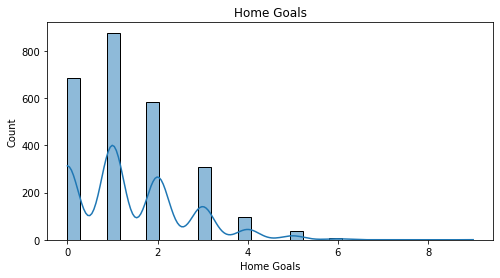

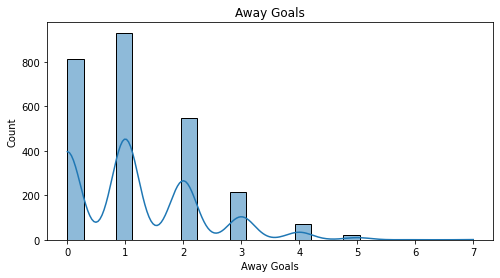

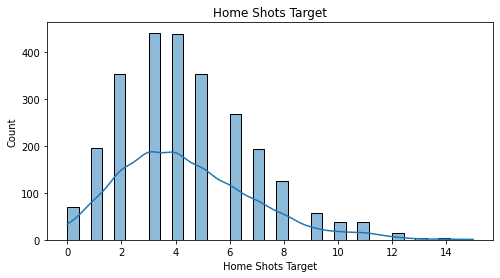

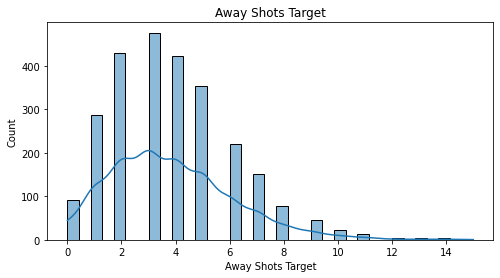

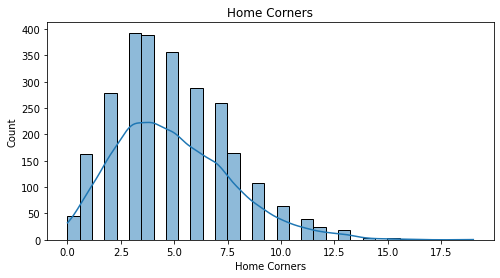

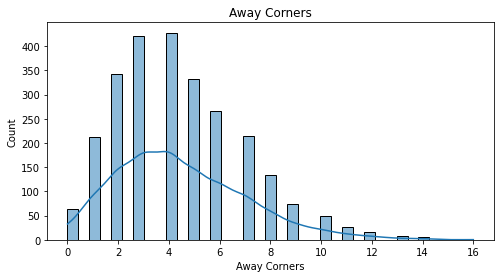

In [24]:
for col in df_test.describe().columns[1:]:
    fig = plt.figure(figsize=(8,4))
    sns.histplot(df_test[col], kde=True)
    plt.title(col)
    plt.show()  

In [25]:
for col in df_test.describe().columns[1:]:
    skew_value = df_test[col].skew()
    print(f"Feature {col} skew value: {skew_value}")

Feature Home Goals skew value: 0.9444311873828706
Feature Away Goals skew value: 0.9814174461009152
Feature Home Shots Target skew value: 0.736353760274656
Feature Away Shots Target skew value: 0.7797035652546918
Feature Home Corners skew value: 0.6983875090429592
Feature Away Corners skew value: 0.7191095360116391


- The variables shown are all moderately right skewed, which is congruent with intuition. 

In [26]:
df_test.query('`Home Shots Target`>10')['Home Team'].unique()

array(['ath madrid', 'las palmas', 'bayern munich', 'ein frankfurt',
       'leverkusen', 'rb leipzig', 'dortmund', 'hoffenheim', 'hamburg',
       'hannover', 'sandhausen', 'darmstadt', 'heidenheim', 'juventus',
       'sassuolo', 'inter', 'torino', 'atalanta', 'lazio', 'napoli',
       'venezia', 'empoli', 'man united', 'tottenham', 'man city',
       'cardiff', 'blackburn', 'millwall', 'peterboro', 'accrington',
       'oxford', 'cambridge', 'oldham', 'cheltenham', 'rangers', 'celtic',
       'strasbourg', 'paris sg', 'montpellier', 'rennes', 'marseille',
       'clermont', 'mouscron', 'anderlecht', 'mechelen', 'fenerbahce',
       'trabzonspor', 'kayserispor'], dtype=object)

In [27]:
df_test.query('`Home Team` == "porto"')['Home Shots Target'].describe()

count    10.000000
mean      5.300000
std       1.337494
min       3.000000
25%       4.250000
50%       5.500000
75%       6.000000
max       7.000000
Name: Home Shots Target, dtype: float64

In [28]:
df_test.query('`Home Team` == "benfica"')['Home Shots Target'].describe()

count    10.000000
mean      4.800000
std       2.529822
min       1.000000
25%       3.500000
50%       5.000000
75%       6.000000
max       9.000000
Name: Home Shots Target, dtype: float64

## Feature Engineering


1. League Average Goals Scored Home (L_Avg_G_Sco_Home)
2. League Average Goals Scored Home Current Season (L_Avg_G_Sco_Home_CS)
3. League Average Goals Scored Away (L_Avg_G_Sco_Away)
4. League Average Goals Scored Away Current Season (L_Avg_G_Sco_Away_CS)

In [29]:
df_test['L_Avg_G_Sco_Home'] = df_test.apply(FE.league_average_goals, df=df_hist, home_away='Home', seasons=[19,20], axis=1)
df_test['L_Avg_G_Sco_Home_CS'] = df_test.apply(FE.league_average_goals, df=df_hist, home_away='Home', seasons=[20], axis=1)
df_test['L_Avg_G_Sco_Away'] = df_test.apply(FE.league_average_goals, df=df_hist, home_away='Away', seasons=[19,20], axis=1) 
df_test['L_Avg_G_Sco_Away_CS'] = df_test.apply(FE.league_average_goals, df=df_hist, home_away='Away', seasons=[20], axis=1)

In [30]:
group_avg_goals = df_test.groupby('Div').mean()[['L_Avg_G_Sco_Home', 'L_Avg_G_Sco_Away']]
group_avg_goals['Diff'] = group_avg_goals.apply(lambda x: x['L_Avg_G_Sco_Home'] - x['L_Avg_G_Sco_Away'], axis=1)
group_avg_goals.sort_values('Diff', ascending=False)

L_Avg_G_Sco_Home  L_Avg_G_Sco_Away      Diff
Div                                              
SC2          1.526100          1.123113  0.402986
G1           1.341521          0.996838  0.344682
T1           1.557509          1.214649  0.342860
SP1          1.400361          1.076691  0.323670
SC1          1.546784          1.227864  0.318920
D2           1.584643          1.297068  0.287575
B1           1.581049          1.295481  0.285568
SP2          1.229834          0.946197  0.283637
F1           1.446905          1.178157  0.268748
I2           1.356498          1.103758  0.252740
E2           1.421608          1.190141  0.231468
E3           1.355257          1.126914  0.228343
SC0          1.408856          1.187053  0.221803
I1           1.614580          1.424315  0.190265
E0           1.448136          1.259420  0.188716
SC3          1.560396          1.371755  0.188641
E1           1.329463          1.144371  0.185092
F2           1.230787          1.050118  0.180669
P1           1.309516          1.141578  0.167939
D1           1.645326          1.499616  0.145710

- Both Turkish and Greek leagues are on the top three regarding difference between average home and away goals. It is curious that both of them are known for a high level of passionate supporters, which can lead to potencially inhospit stadium atmospheres when playing away. 

5. Home Team Average Goals Scored (HT_Avg_G_Scored)
6. Home Team Average Goals Scored Current Season (HT_Avg_G_Scored_CS)
7. Home Team Average Goals Scored Last 10 Games (HT_Avg_G_Scored_10Games)
8. Home Team Average Goals Scored Last 5 Games (HT_Avg_G_Scored_5Games)
9. Home Team Average Goals Scored Last 3 Games (HT_Avg_G_Scored_3Games)
10. Away Team Average Goals Scored (AT_Avg_G_Scored)
11. Away Team Average Goals Scored Current Season (AT_Avg_G_Scored_CS)
12. Away Team Average Goals Scored Last 10 Games (AT_Avg_G_Scored_10Games)
13. Away Team Average Goals Scored Last 5 Games (AT_Avg_G_Scored_5Games)
14. Away Team Average Goals Scored Last 3 Games (AT_Avg_G_Scored_3Games)


In [31]:
df_test['HT_Avg_G_Scored'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                           seasons=[19,20], stat='goals', axis=1)

df_test['HT_Avg_G_Scored_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                              seasons=[20], stat='goals', axis=1)

df_test['HT_Avg_G_Scored_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                   seasons=[20], stat='goals', sample=10, axis=1)

df_test['HT_Avg_G_Scored_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                  seasons=[20], stat='goals', sample=5, axis=1)

df_test['HT_Avg_G_Scored_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                  seasons=[20], stat='goals', sample=3, axis=1)

df_test['AT_Avg_G_Scored'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                           seasons=[19,20], stat='goals', axis=1)

df_test['AT_Avg_G_Scored_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                              seasons=[20], stat='goals', axis=1)

df_test['AT_Avg_G_Scored_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                   seasons=[20], stat='goals', sample=10, axis=1)

df_test['AT_Avg_G_Scored_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                  seasons=[20], stat='goals', sample=5, axis=1)

df_test['AT_Avg_G_Scored_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                  seasons=[20], stat='goals', sample=3, axis=1)



15. Home Team Average Goals Conceded (HT_Avg_G_Conceded)
16. Home Team Average Goals Conceded Current Season (HT_Avg_G_Conceded_CS)
17. Home Team Average Goals Conceded Last 10 Games (HT_Avg_G_Conceded_10Games)
18. Home Team Average Goals Conceded Last 5 Games (HT_Avg_G_Conceded_5Games)
19. Home Team Average Goals Conceded Last 3 Games (HT_Avg_G_Conceded_3Games)
20. Away Team Average Goals Conceded (AT_Avg_G_Conceded)
21. Away Team Average Goals Conceded Current Season (AT_Avg_G_Conceded_CS)
22. Away Team Average Goals Conceded Last 10 Games (AT_Avg_G_Conceded_10Games)
23. Away Team Average Goals Conceded Last 5 Games (AT_Avg_G_Conceded_5Games)
24. Away Team Average Goals Conceded Last 3 Games (AT_Avg_G_Conceded_3Games)

In [32]:
df_test['HT_Avg_G_Conceded'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                             seasons=[19,20], stat='goals', scored_conceded='conceded', axis=1)

df_test['HT_Avg_G_Conceded_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                seasons=[20], stat='goals', scored_conceded='conceded', axis=1)

df_test['HT_Avg_G_Conceded_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                     seasons=[20], stat='goals', sample=10, scored_conceded='conceded', axis=1)

df_test['HT_Avg_G_Conceded_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                    seasons=[20], stat='goals', sample=5, scored_conceded='conceded', axis=1)

df_test['HT_Avg_G_Conceded_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                    seasons=[20], stat='goals', sample=3, scored_conceded='conceded', axis=1)

df_test['AT_Avg_G_Conceded'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                             seasons=[19,20], stat='goals', scored_conceded='conceded', axis=1)

df_test['AT_Avg_G_Conceded_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                seasons=[20], stat='goals', scored_conceded='conceded', axis=1)

df_test['AT_Avg_G_Conceded_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                     seasons=[20], stat='goals', sample=10, scored_conceded='conceded', axis=1)

df_test['AT_Avg_G_Conceded_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                    seasons=[20], stat='goals', sample=5, scored_conceded='conceded', axis=1)

df_test['AT_Avg_G_Conceded_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                    seasons=[20], stat='goals', sample=3, scored_conceded='conceded', axis=1)


25. Home Team Average Corners Taken (HT_Avg_C_Taken)
26. Home Team Average Corners Taken Current Season (HT_Avg_C_Taken_CS)
27. Home Team Average Corners Taken Last 10 Games (HT_Avg_C_Taken_10Games)
28. Home Team Average Corners Taken Last 5 Games (HT_Avg_C_Taken_5Games)
29. Home Team Average Corners Taken Last 3 Games (HT_Avg_C_Taken_3Games)
30. Away Team Average Corners Taken (AT_Avg_C_Taken)
31. Away Team Average Corners Taken Current Season (AT_Avg_C_Taken_CS)
32. Away Team Average Corners Taken Last 10 Games (AT_Avg_C_Taken_10Games)
33. Away Team Average Corners Taken Last 5 Games (AT_Avg_C_Taken_5Games)
34. Away Team Average Corners Taken Last 3 Games (AT_Avg_C_Taken_3Games)

In [33]:
df_test['HT_Avg_C_Taken'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                           seasons=[19,20], stat='corners', axis=1)

df_test['HT_Avg_C_Taken_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                             seasons=[20], stat='corners', axis=1)

df_test['HT_Avg_C_Taken_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                   seasons=[20], stat='corners', sample=10, axis=1)

df_test['HT_Avg_C_Taken_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                  seasons=[20], stat='corners', sample=5, axis=1)

df_test['HT_Avg_C_Taken_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                  seasons=[20], stat='corners', sample=3, axis=1)

df_test['AT_Avg_C_Taken'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                           seasons=[19,20], stat='corners', axis=1)

df_test['AT_Avg_C_Taken_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                              seasons=[20], stat='corners', axis=1)

df_test['AT_Avg_C_Taken_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                   seasons=[20], stat='corners', sample=10, axis=1)

df_test['AT_Avg_C_Taken_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                  seasons=[20], stat='corners', sample=5, axis=1)

df_test['AT_Avg_C_Taken_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                  seasons=[20], stat='corners', sample=3, axis=1)



35. Home Team Average Corners Allowed (HT_Avg_C_Allowed)
36. Home Team Average Corners Allowed Current Season (HT_Avg_C_Allowed_CS)
37. Home Team Average Corners Allowed Last 10 Games (HT_Avg_C_Allowed_10Games)
38. Home Team Average Corners Allowed Last 5 Games (HT_Avg_C_Allowed_5Games)
39. Home Team Average Corners Allowed Last 3 Games (HT_Avg_C_Allowed_3Games)
40. Away Team Average Corners Allowed (AT_Avg_C_Allowed)
41. Away Team Average Corners Allowed Current Season (AT_Avg_C_Allowed_CS)
42. Away Team Average Corners Allowed Last 10 Games (AT_Avg_C_Allowed_10Games)
43. Away Team Average Corners Allowed Last 5 Games (AT_Avg_C_Allowed_5Games)
44. Away Team Average Corners Allowed Last 3 Games (AT_Avg_C_Allowed_3Games)

In [34]:
df_test['HT_Avg_C_Allowed'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                            seasons=[19,20], stat='corners', scored_conceded='conceded', axis=1)

df_test['HT_Avg_C_Allowed_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                seasons=[20], stat='corners', scored_conceded='conceded', axis=1)

df_test['HT_Avg_C_Allowed_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                     seasons=[20], stat='corners', sample=10, scored_conceded='conceded', axis=1)

df_test['HT_Avg_C_Allowed_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                    seasons=[20], stat='corners', sample=5, scored_conceded='conceded', axis=1)

df_test['HT_Avg_C_Allowed_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                    seasons=[20], stat='corners', sample=3, scored_conceded='conceded', axis=1)

df_test['AT_Avg_C_Allowed'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                             seasons=[19,20], stat='corners', scored_conceded='conceded', axis=1)

df_test['AT_Avg_C_Allowed_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                seasons=[20], stat='corners', scored_conceded='conceded', axis=1)

df_test['AT_Avg_C_Allowed_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                     seasons=[20], stat='corners', sample=10, scored_conceded='conceded', axis=1)

df_test['AT_Avg_C_Allowed_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                    seasons=[20], stat='corners', sample=5, scored_conceded='conceded', axis=1)

df_test['AT_Avg_C_Allowed_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                    seasons=[20], stat='corners', sample=3, scored_conceded='conceded', axis=1)

45. Home Team Average Shots Taken (HT_Avg_S_Taken)
46. Home Team Average Shots Taken Current Season (HT_Avg_S_Taken_CS)
47. Home Team Average Shots Taken Last 10 Games (HT_Avg_S_Taken_10Games)
48. Home Team Average Shots Taken Last 5 Games (HT_Avg_S_Taken_5Games)
49. Home Team Average Shots Taken Last 3 Games (HT_Avg_S_Taken_3Games)
50. Away Team Average Shots Taken (AT_Avg_S_Taken)
51. Away Team Average Shots Taken Current Season (AT_Avg_S_Taken_CS)
52. Away Team Average Shots Taken Last 10 Games (AT_Avg_S_Taken_10Games)
53. Away Team Average Shots Taken Last 5 Games (AT_Avg_S_Taken_5Games)
54. Away Team Average Shots Taken Last 3 Games (AT_Avg_S_Taken_3Games)

In [35]:
df_test['HT_Avg_S_Taken'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                           seasons=[19,20], stat='shots', axis=1)

df_test['HT_Avg_S_Taken_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                             seasons=[20], stat='shots', axis=1)

df_test['HT_Avg_S_Taken_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                   seasons=[20], stat='shots', sample=10, axis=1)

df_test['HT_Avg_S_Taken_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                  seasons=[20], stat='shots', sample=5, axis=1)

df_test['HT_Avg_S_Taken_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                  seasons=[20], stat='shots', sample=3, axis=1)

df_test['AT_Avg_S_Taken'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                           seasons=[19,20], stat='shots', axis=1)

df_test['AT_Avg_S_Taken_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                              seasons=[20], stat='shots', axis=1)

df_test['AT_Avg_S_Taken_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                   seasons=[20], stat='shots', sample=10, axis=1)

df_test['AT_Avg_S_Taken_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                  seasons=[20], stat='shots', sample=5, axis=1)

df_test['AT_Avg_S_Taken_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                  seasons=[20], stat='shots', sample=3, axis=1)

55. Home Team Average Shots Allowed (HT_Avg_S_Allowed)
56. Home Team Average Shots Allowed Current Season (HT_Avg_S_Allowed_CS)
57. Home Team Average Shots Allowed Last 10 Games (HT_Avg_S_Allowed_10Games)
58. Home Team Average Shots Allowed Last 5 Games (HT_Avg_S_Allowed_5Games)
59. Home Team Average Shots Allowed Last 3 Games (HT_Avg_S_Allowed_3Games)
60. Away Team Average Shots Allowed (AT_Avg_S_Allowed)
61. Away Team Average Shots Allowed Current Season (AT_Avg_S_Allowed_CS)
62. Away Team Average Shots Allowed Last 10 Games (AT_Avg_S_Allowed_10Games)
63. Away Team Average Shots Allowed Last 5 Games (AT_Avg_S_Allowed_5Games)
64. Away Team Average Shots Allowed Last 3 Games (AT_Avg_S_Allowed_3Games)

In [36]:
df_test['HT_Avg_S_Allowed'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                            seasons=[19,20], stat='shots', scored_conceded='conceded', axis=1)

df_test['HT_Avg_S_Allowed_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                seasons=[20], stat='shots', scored_conceded='conceded', axis=1)

df_test['HT_Avg_S_Allowed_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                     seasons=[20], stat='shots', sample=10, scored_conceded='conceded', axis=1)

df_test['HT_Avg_S_Allowed_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home', 
                                                    seasons=[20], stat='shots', sample=5, scored_conceded='conceded', axis=1)

df_test['HT_Avg_S_Allowed_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Home',
                                                    seasons=[20], stat='shots', sample=3, scored_conceded='conceded', axis=1)

df_test['AT_Avg_S_Allowed'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                             seasons=[19,20], stat='shots', scored_conceded='conceded', axis=1)

df_test['AT_Avg_S_Allowed_CS'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                seasons=[20], stat='shots', scored_conceded='conceded', axis=1)

df_test['AT_Avg_S_Allowed_10Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away', 
                                                     seasons=[20], stat='shots', sample=10, scored_conceded='conceded', axis=1)

df_test['AT_Avg_S_Allowed_5Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                    seasons=[20], stat='shots', sample=5, scored_conceded='conceded', axis=1)

df_test['AT_Avg_S_Allowed_3Games'] = df_test.apply(FE.team_average_stat, df=df_hist, home_away='Away',
                                                    seasons=[20], stat='shots', sample=3, scored_conceded='conceded', axis=1)

In [37]:
df_test.head(5)

Div           League  Season       Date   Hour    Home Team   Away Team  \
535  SP1  Spanish La Liga      20 2021-01-02  13:00   villarreal     levante   
536  SP1  Spanish La Liga      20 2021-01-02  15:15        betis     sevilla   
537  SP1  Spanish La Liga      20 2021-01-02  17:30       getafe  valladolid   
538  SP1  Spanish La Liga      20 2021-01-02  20:00  real madrid       celta   
540  SP1  Spanish La Liga      20 2021-01-03  15:15       alaves  ath madrid   

     Home Goals  Away Goals  Home Shots Target  Away Shots Target  \
535         2.0         1.0                7.0                2.0   
536         1.0         1.0                3.0                2.0   
537         0.0         1.0                4.0                2.0   
538         2.0         0.0                2.0                1.0   
540         1.0         2.0                1.0                4.0   

     Home Corners  Away Corners  More_2.5    BTS  \
535           3.0           5.0      True   True   
536           2.0           1.0     False   True   
537           5.0           9.0     False  False   
538           1.0           5.0     False  False   
540           1.0           5.0      True   True   

     Home_Team_Promoted_Relegated  Away_Team_Promoted_Relegated  \
535                         False                         False   
536                         False                         False   
537                         False                         False   
538                         False                         False   
540                         False                         False   

     Home Team Win   Draw  Away Team Win  L_Avg_G_Sco_Home  \
535           True  False          False          1.405714   
536          False   True          False          1.405714   
537          False  False           True          1.405714   
538           True  False          False          1.405714   
540          False  False           True          1.405714   

     L_Avg_G_Sco_Home_CS  L_Avg_G_Sco_Away  L_Avg_G_Sco_Away_CS  \
535             1.324138          1.053333             1.082759   
536             1.324138          1.053333             1.082759   
537             1.324138          1.053333             1.082759   
538             1.324138          1.053333             1.082759   
540             1.324138          1.053333             1.082759   

     HT_Avg_G_Scored  HT_Avg_G_Scored_CS  HT_Avg_G_Scored_10Games  \
535         1.814815            1.500000                 1.500000   
536         1.653846            1.285714                 1.285714   
537         1.222222            1.000000                 1.000000   
538         2.038462            1.857143                 1.857143   
540         0.962963            0.750000                 0.750000   

     HT_Avg_G_Scored_5Games  HT_Avg_G_Scored_3Games  AT_Avg_G_Scored  \
535                     1.2                0.666667         1.037037   
536                     1.0                0.666667         1.384615   
537                     0.6                0.666667         0.769231   
538                     2.4                2.333333         0.851852   
540                     1.0                1.333333         1.240000   

     AT_Avg_G_Scored_CS  AT_Avg_G_Scored_10Games  AT_Avg_G_Scored_5Games  \
535            1.000000                 1.000000                     0.6   
536            1.142857                 1.142857                     0.8   
537            0.857143                 0.857143                     1.2   
538            1.000000                 1.000000                     1.4   
540            1.333333                 1.333333                     1.6   

     AT_Avg_G_Scored_3Games  HT_Avg_G_Conceded  HT_Avg_G_Conceded_CS  \
535                0.666667           1.148148              0.750000   
536                1.000000           1.423077              1.428571   
537                1.333333           1.000000              0.875000   
538                1.666

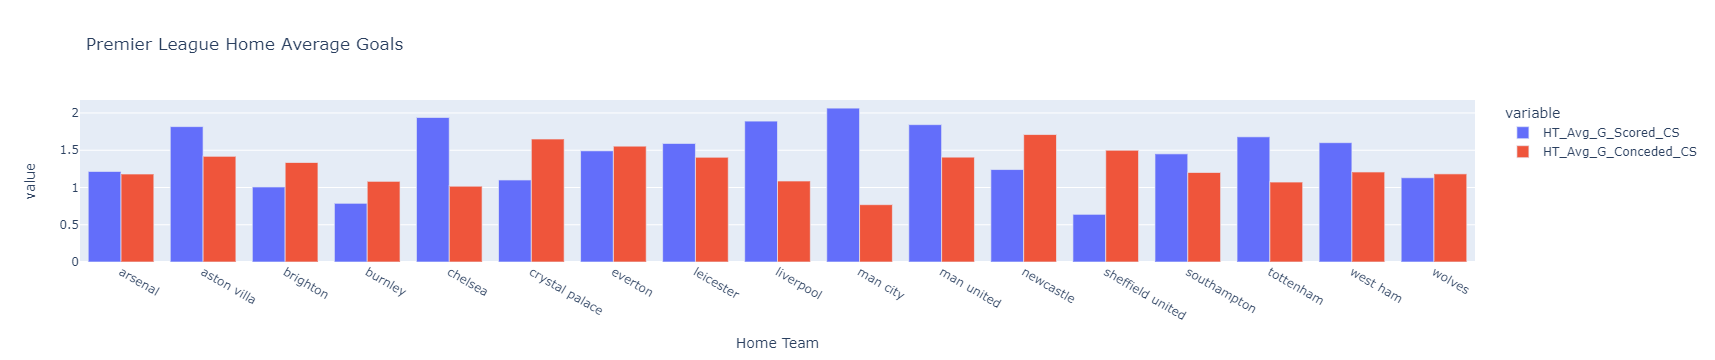

In [38]:
group_avg_goals_ht = df_test.groupby(['Div', 'Home Team']).mean()[['HT_Avg_G_Scored_CS', 'HT_Avg_G_Conceded_CS', 
                                                                   'AT_Avg_G_Scored_CS', 'AT_Avg_G_Conceded_CS']].reset_index(drop=False)

premier_league_avg_goals = group_avg_goals_ht.query('Div=="E0"')

px.bar(premier_league_avg_goals.set_index('Home Team'), 
       y=['HT_Avg_G_Scored_CS', 'HT_Avg_G_Conceded_CS'], 
       title='Premier League Home Average Goals', 
       barmode='group')



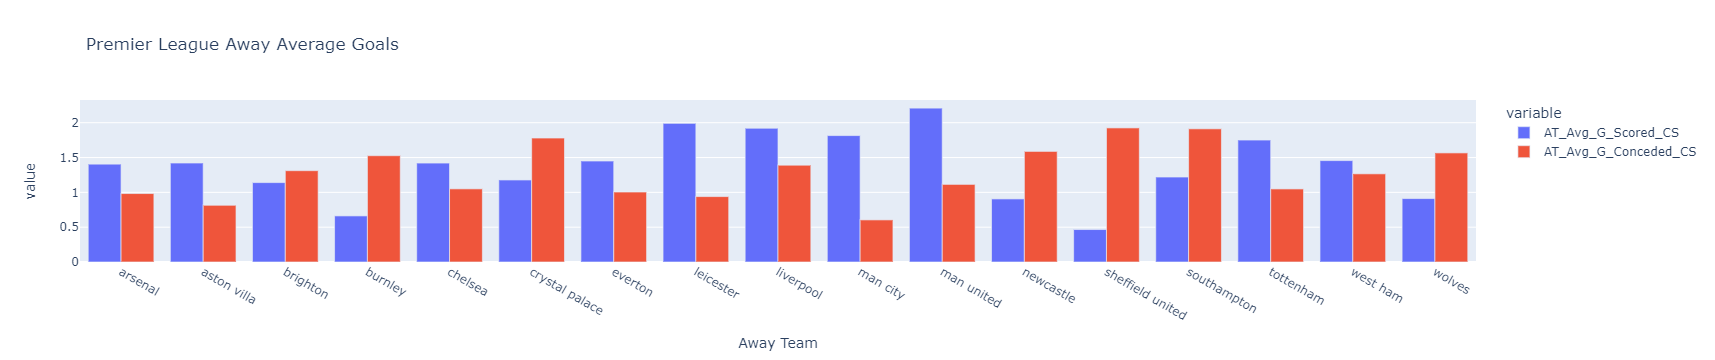

In [39]:
group_avg_goals_at = df_test.groupby(['Div', 'Away Team']).mean()[['HT_Avg_G_Scored_CS', 'HT_Avg_G_Conceded_CS', 
                                                                   'AT_Avg_G_Scored_CS', 'AT_Avg_G_Conceded_CS']].reset_index(drop=False)

premier_league_avg_goals = group_avg_goals_at.query('Div=="E0"')

px.bar(premier_league_avg_goals.set_index('Away Team'), 
       y=['AT_Avg_G_Scored_CS', 'AT_Avg_G_Conceded_CS'], 
       title='Premier League Away Average Goals', 
       barmode='group')


65. Home Team Attack Strenght (HT_Att_Strenght)
66. Home Team Attack Strenght Current Season (HT_Att_Strenght_CS)
67. Home Team Attack Strenght Last 10 Games (HT_Att_Strenght_10Games)
68. Home Team Attack Strenght Last 5 Games (HT_Att_Strenght_5Games)
69. Home Team Attack Strenght Last 3 Games (HT_Att_Strenght_3Games)
70. Home Team Defense Strenght (HT_Def_Strenght)
71. Home Team Defense Strenght Current Season (HT_Def_Strenght_CS)
72. Home Team Defense Strenght Last 10 Games (HT_Def_Strenght_10Games)
73. Home Team Defense Strenght Last 5 Games (HT_Def_Strenght_5Games)
74. Home Team Defense Strenght Last 3 Games (HT_Def_Strenght_3Games)
75. Away Team Attack Strenght (AT_Att_Strenght)
76. Away Team Attack Strenght Current Season (AT_Att_Strenght_CS)
77. Away Team Attack Strenght Last 10 Games (AT_Att_Strenght_10Games)
78. Away Team Attack Strenght Last 5 Games (AT_Att_Strenght_5Games)
79. Away Team Attack Strenght Last 3 Games (AT_Att_Strenght_3Games)
80. Away Team Defense Strenght (AT_Def_Strenght)
81. Away Team Defense Strenght Current Season (AT_Def_Strenght_CS)
82. Away Team Defense Strenght Last 10 Games (AT_Def_Strenght_10Games)
83. Away Team Defense Strenght Last 5 Games (AT_Def_Strenght_5Games)
84. Away Team Defense Strenght Last 3 Games (AT_Def_Strenght_3Games)


In [40]:
df_test['HT_Att_Strenght'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                           attack=True, cs=False, axis=1)

df_test['HT_Att_Strenght_CS'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                              attack=True, cs=True, axis=1)

df_test['HT_Att_Strenght_10Games'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                                   attack=True, cs=True, number_games=10, axis=1)

df_test['HT_Att_Strenght_5Games'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                                   attack=True, cs=True, number_games=5, axis=1)

df_test['HT_Att_Strenght_3Games'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                                   attack=True, cs=True, number_games=3, axis=1)

df_test['HT_Def_Strenght'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                           attack=False, cs=False, axis=1)

df_test['HT_Def_Strenght_CS'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                              attack=False, cs=True, axis=1)

df_test['HT_Def_Strenght_10Games'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                                   attack=False, cs=True, number_games=10, axis=1)

df_test['HT_Def_Strenght_5Games'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                                   attack=False, cs=True, number_games=5, axis=1)

df_test['HT_Def_Strenght_3Games'] = df_test.apply(FE.calculate_strenght, home_away='Home', 
                                                  attack=False, cs=True, number_games=3, axis=1)

df_test['AT_Att_Strenght'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                           attack=True, cs=False, axis=1)

df_test['AT_Att_Strenght_CS'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                              attack=True, cs=True, axis=1)

df_test['AT_Att_Strenght_10Games'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                                   attack=True, cs=True, number_games=10, axis=1)

df_test['AT_Att_Strenght_5Games'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                                   attack=True, cs=True, number_games=5, axis=1)

df_test['AT_Att_Strenght_3Games'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                                   attack=True, cs=True, number_games=3, axis=1)

df_test['AT_Def_Strenght'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                           attack=False, cs=False, axis=1)

df_test['AT_Def_Strenght_CS'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                              attack=False, cs=True, axis=1)

df_test['AT_Def_Strenght_10Games'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                                   attack=False, cs=True, number_games=10, axis=1)

df_test['AT_Def_Strenght_5Games'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                                   attack=False, cs=True, number_games=5, axis=1)

df_test['AT_Def_Strenght_3Games'] = df_test.apply(FE.calculate_strenght, home_away='Away', 
                                                  attack=False, cs=True, number_games=3, axis=1)


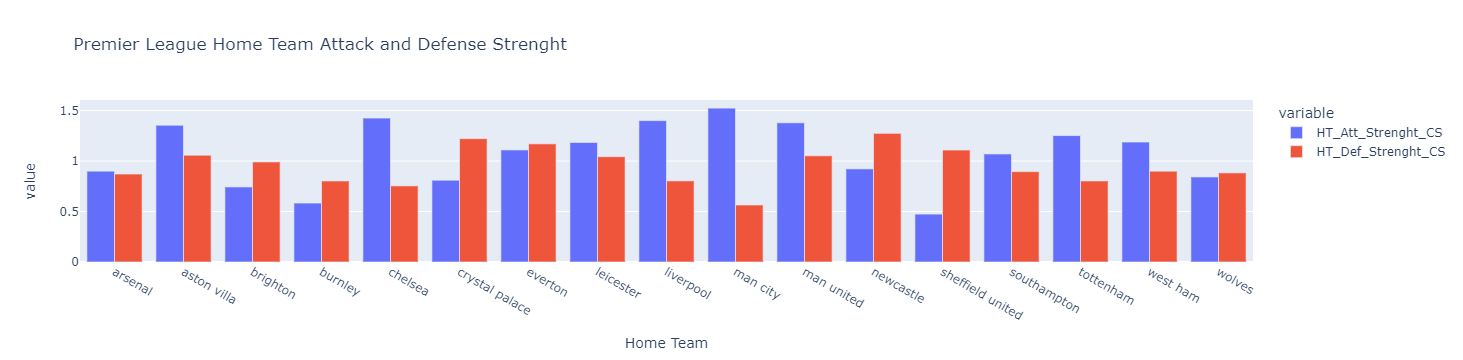

In [41]:
group_strenght_ht = df_test.groupby(['Div', 'Home Team']).mean()[['HT_Att_Strenght_CS', 'HT_Def_Strenght_CS']].reset_index(drop=False)

premier_league_strenght = group_strenght_ht.query('Div=="E0"')

px.bar(premier_league_strenght.set_index('Home Team'), 
       y=['HT_Att_Strenght_CS', 'HT_Def_Strenght_CS'], 
       title='Premier League Home Team Attack and Defense Strenght', 
       barmode='group')


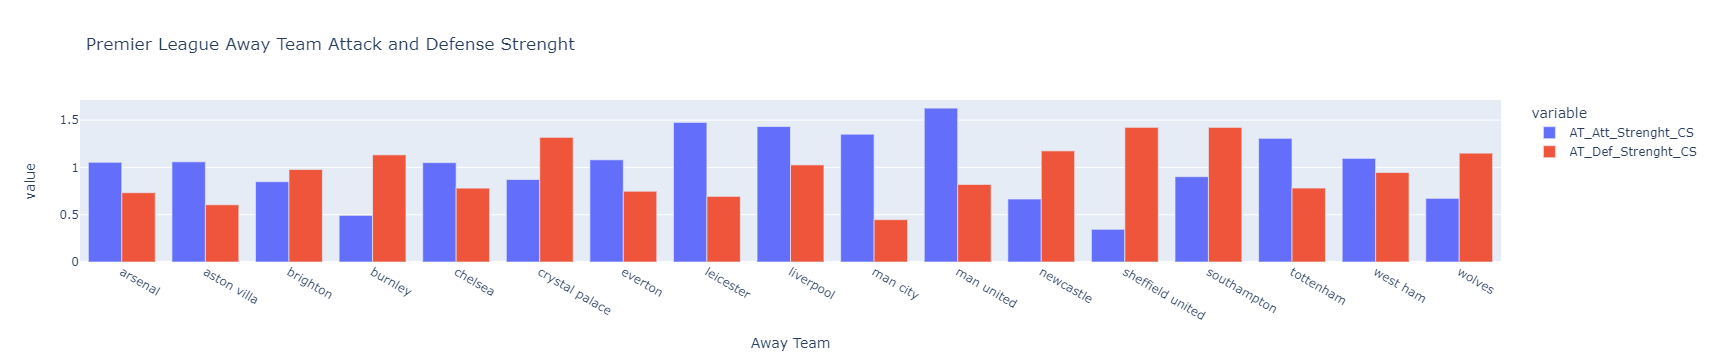

In [42]:
group_strenght_at = df_test.groupby(['Div', 'Away Team']).mean()[['AT_Att_Strenght_CS', 'AT_Def_Strenght_CS']].reset_index(drop=False)

premier_league_strenght = group_strenght_at.query('Div=="E0"')

px.bar(premier_league_strenght.set_index('Away Team'), 
       y=['AT_Att_Strenght_CS', 'AT_Def_Strenght_CS'], 
       title='Premier League Away Team Attack and Defense Strenght', 
       barmode='group')

85. Home Team Goal Expectancy (HT_G_Exp)
86. Home Team Goal Expectancy Current Season (HT_G_Exp_CS)
87. Home Team Goal Expectancy Last 10 Games (HT_G_Exp_10Games)
88. Home Team Goal Expectancy Last 5 Games (HT_G_Exp_5Games)
89. Home Team Goal Expectancy Last 3 Games (HT_G_Exp_3Games)
90. Home Team Goal Expectancy Mean Between CS and Last 3 Games (HT_G_Exp_CS-3Games)
91. Away Team Goal Expectancy (AT_G_Exp)
92. Away Team Goal Expectancy Current Season (AT_G_Exp_CS)
93. Away Team Goal Expectancy Last 10 Games (AT_G_Exp_10Games)
94. Away Team Goal Expectancy Last 5 Games (AT_G_Exp_5Games)
95. Away Team Goal Expectancy Last 3 Games (AT_G_Exp_3Games)
96. Away Team Goal Expectancy Mean Between CS and Last 3 Games (AT_G_Exp_CS-3Games)

In [43]:
df_test.head()

Div           League  Season       Date   Hour    Home Team   Away Team  \
535  SP1  Spanish La Liga      20 2021-01-02  13:00   villarreal     levante   
536  SP1  Spanish La Liga      20 2021-01-02  15:15        betis     sevilla   
537  SP1  Spanish La Liga      20 2021-01-02  17:30       getafe  valladolid   
538  SP1  Spanish La Liga      20 2021-01-02  20:00  real madrid       celta   
540  SP1  Spanish La Liga      20 2021-01-03  15:15       alaves  ath madrid   

     Home Goals  Away Goals  Home Shots Target  Away Shots Target  \
535         2.0         1.0                7.0                2.0   
536         1.0         1.0                3.0                2.0   
537         0.0         1.0                4.0                2.0   
538         2.0         0.0                2.0                1.0   
540         1.0         2.0                1.0                4.0   

     Home Corners  Away Corners  More_2.5    BTS  \
535           3.0           5.0      True   True   
536           2.0           1.0     False   True   
537           5.0           9.0     False  False   
538           1.0           5.0     False  False   
540           1.0           5.0      True   True   

     Home_Team_Promoted_Relegated  Away_Team_Promoted_Relegated  \
535                         False                         False   
536                         False                         False   
537                         False                         False   
538                         False                         False   
540                         False                         False   

     Home Team Win   Draw  Away Team Win  L_Avg_G_Sco_Home  \
535           True  False          False          1.405714   
536          False   True          False          1.405714   
537          False  False           True          1.405714   
538           True  False          False          1.405714   
540          False  False           True          1.405714   

     L_Avg_G_Sco_Home_CS  L_Avg_G_Sco_Away  L_Avg_G_Sco_Away_CS  \
535             1.324138          1.053333             1.082759   
536             1.324138          1.053333             1.082759   
537             1.324138          1.053333             1.082759   
538             1.324138          1.053333             1.082759   
540             1.324138          1.053333             1.082759   

     HT_Avg_G_Scored  HT_Avg_G_Scored_CS  HT_Avg_G_Scored_10Games  \
535         1.814815            1.500000                 1.500000   
536         1.653846            1.285714                 1.285714   
537         1.222222            1.000000                 1.000000   
538         2.038462            1.857143                 1.857143   
540         0.962963            0.750000                 0.750000   

     HT_Avg_G_Scored_5Games  HT_Avg_G_Scored_3Games  AT_Avg_G_Scored  \
535                     1.2                0.666667         1.037037   
536                     1.0                0.666667         1.384615   
537                     0.6                0.666667         0.769231   
538                     2.4                2.333333         0.851852   
540                     1.0                1.333333         1.240000   

     AT_Avg_G_Scored_CS  AT_Avg_G_Scored_10Games  AT_Avg_G_Scored_5Games  \
535            1.000000                 1.000000                     0.6   
536            1.142857                 1.142857                     0.8   
537            0.857143                 0.857143                     1.2   
538            1.000000                 1.000000                     1.4   
540            1.333333                 1.333333                     1.6   

     AT_Avg_G_Scored_3Games  HT_Avg_G_Conceded  HT_Avg_G_Conceded_CS  \
535                0.666667           1.148148              0.750000   
536                1.000000           1.423077              1.428571   
537                1.333333           1.000000              0.875000   
538                1.666

In [44]:
df_test['HT_G_Exp'] = df_test.apply(FE.goal_expectancy, home_away='Home', cs=False, axis=1)
df_test['HT_G_Exp_CS'] = df_test.apply(FE.goal_expectancy, home_away='Home', cs=True, axis=1)
df_test['HT_G_Exp_10Games'] = df_test.apply(FE.goal_expectancy, home_away='Home', cs=True, number_games=10, axis=1)
df_test['HT_G_Exp_5Games'] = df_test.apply(FE.goal_expectancy, home_away='Home', cs=True, number_games=5, axis=1)
df_test['HT_G_Exp_3Games'] = df_test.apply(FE.goal_expectancy, home_away='Home', cs=True, number_games=3, axis=1)
df_test['HT_G_Exp_CS-3Games'] = df_test.eval('(HT_G_Exp_CS + HT_G_Exp_3Games)/2')

df_test['AT_G_Exp'] = df_test.apply(FE.goal_expectancy, home_away='Away', cs=False, axis=1)
df_test['AT_G_Exp_CS'] = df_test.apply(FE.goal_expectancy, home_away='Away', cs=True, axis=1)
df_test['AT_G_Exp_10Games'] = df_test.apply(FE.goal_expectancy, home_away='Away', cs=True, number_games=10, axis=1)
df_test['AT_G_Exp_5Games'] = df_test.apply(FE.goal_expectancy, home_away='Away', cs=True, number_games=5, axis=1)
df_test['AT_G_Exp_3Games'] = df_test.apply(FE.goal_expectancy, home_away='Away', cs=True, number_games=3, axis=1)
df_test['AT_G_Exp_CS-3Games'] = df_test.eval('(AT_G_Exp_CS + AT_G_Exp_3Games)/2')


97. Home Team Average Wins (HT_Avg_Wins)
98. Home Team Average Wins Current Season (HT_Avg_Wins_CS)
99. Home Team Average Wins Last 10 Games (HT_Avg_Wins_10Games)
100. Home Team Average Wins Last 5 Games (HT_Avg_Wins_5Games)
101. Home Team Average Wins Last 3 Games (HT_Avg_Wins_3Games)
102. Home Team Average Draws (HT_Avg_Draws)
103. Home Team Average Draws Current Season (HT_Avg_Draws_CS)
104. Home Team Average Draws Last 10 Games (HT_Avg_Draws_10Games)
105. Home Team Average Draws Last 5 Games (HT_Avg_Draws_5Games)
106. Home Team Average Draws Last 3 Games (HT_Avg_Draws_3Games)
107. Home Team Average Losses (HT_Avg_Losses)
108. Home Team Average Losses Current Season (HT_Avg_Losses_CS)
109. Home Team Average Losses Last 10 Games (HT_Avg_Losses_10Games)
110. Home Team Average Losses Last 5 Games (HT_Avg_Losses_5Games)
111. Home Team Average Losses Last 3 Games (HT_Avg_Losses_3Games)

112. Away Team Average Wins (AT_Avg_Wins)
113. Away Team Average Wins Current Season (AT_Avg_Wins_CS)
114. Away Team Average Wins Last 10 Games (AT_Avg_Wins_10Games)
115. Away Team Average Wins Last 5 Games (AT_Avg_Wins_5Games)
116. Away Team Average Wins Last 3 Games (AT_Avg_Wins_3Games)
117. Away Team Average Draws (AT_Avg_Draws)
118. Away Team Average Draws Current Season (AT_Avg_Draws_CS)
119. Away Team Average Draws Last 10 Games (AT_Avg_Draws_10Games)
120. Away Team Average Draws Last 5 Games (AT_Avg_Draws_5Games)
121. Away Team Average Draws Last 3 Games (AT_Avg_Draws_3Games)
122. Away Team Average Losses (AT_Avg_Losses)
123. Away Team Average Losses Current Season (AT_Avg_Losses_CS)
124. Away Team Average Losses Last 10 Games (AT_Avg_Losses_10Games)
125. Away Team Average Losses Last 5 Games (AT_Avg_Losses_5Games)
126. Away Team Average Losses Last 3 Games (AT_Avg_Losses_3Games)


In [45]:
df_test['HT_Avg_Wins'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Home', seasons=[19,20], axis=1)
df_test['HT_Avg_Wins_CS'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Home', seasons=[20], axis=1)
df_test['HT_Avg_Wins_10Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Home', seasons=[20], sample=10, axis=1)
df_test['HT_Avg_Wins_5Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Home', seasons=[20], sample=5, axis=1)
df_test['HT_Avg_Wins_3Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Home', seasons=[20], sample=3, axis=1)

df_test['HT_Avg_Draws'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Home', seasons=[19,20], axis=1)
df_test['HT_Avg_Draws_CS'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Home', seasons=[20], axis=1)
df_test['HT_Avg_Draws_10Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Home', seasons=[20], sample=10, axis=1)
df_test['HT_Avg_Draws_5Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Home', seasons=[20], sample=5, axis=1)
df_test['HT_Avg_Draws_3Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Home', seasons=[20], sample=3, axis=1)

df_test['HT_Avg_Losses'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Home', seasons=[19,20], axis=1)
df_test['HT_Avg_Losses_CS'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Home', seasons=[20], axis=1)
df_test['HT_Avg_Losses_10Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Home', seasons=[20], sample=10, axis=1)
df_test['HT_Avg_Losses_5Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Home', seasons=[20], sample=5, axis=1)
df_test['HT_Avg_Losses_3Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Home', seasons=[20], sample=3, axis=1)



df_test['AT_Avg_Wins'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Away', seasons=[19,20], axis=1)
df_test['AT_Avg_Wins_CS'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Away', seasons=[20], axis=1)
df_test['AT_Avg_Wins_10Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Away', seasons=[20], sample=10, axis=1)
df_test['AT_Avg_Wins_5Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Away', seasons=[20], sample=5, axis=1)
df_test['AT_Avg_Wins_3Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='win', home_away='Away', seasons=[20], sample=3, axis=1)

df_test['AT_Avg_Draws'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Away', seasons=[19,20], axis=1)
df_test['AT_Avg_Draws_CS'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Away', seasons=[20], axis=1)
df_test['AT_Avg_Draws_10Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Away', seasons=[20], sample=10, axis=1)
df_test['AT_Avg_Draws_5Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Away', seasons=[20], sample=5, axis=1)
df_test['AT_Avg_Draws_3Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='draw', home_away='Away', seasons=[20], sample=3, axis=1)

df_test['AT_Avg_Losses'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Away', seasons=[19,20], axis=1)
df_test['AT_Avg_Losses_CS'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Away', seasons=[20], axis=1)
df_test['AT_Avg_Losses_10Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Away', seasons=[20], sample=10, axis=1)
df_test['AT_Avg_Losses_5Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Away', seasons=[20], sample=5, axis=1)
df_test['AT_Avg_Losses_3Games'] = df_test.apply(FE.avg_final_results, df=df_hist, result='loss', home_away='Away', seasons=[20], sample=3, axis=1)


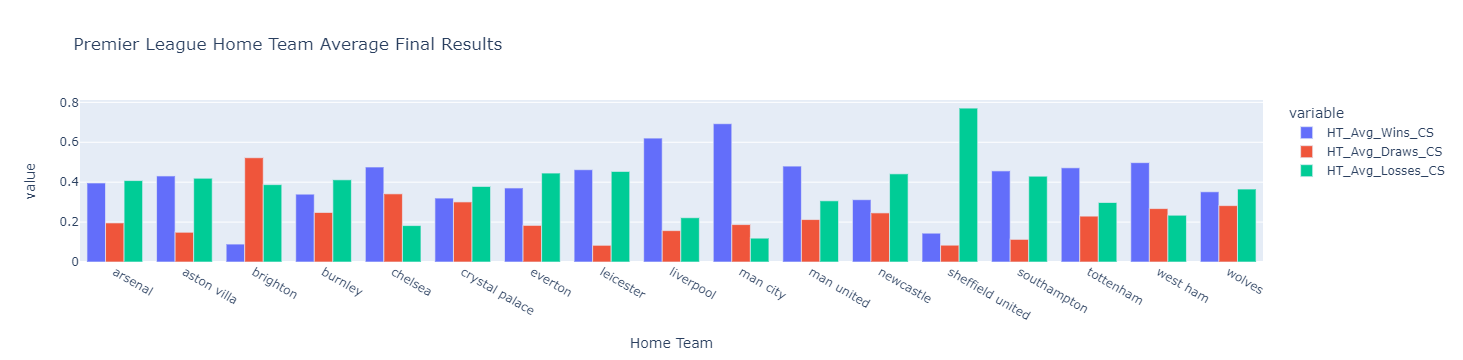

In [46]:
group_result_ht = df_test.groupby(['Div', 'Home Team']).mean()[['HT_Avg_Wins_CS', 'HT_Avg_Draws_CS', 'HT_Avg_Losses_CS']].reset_index(drop=False)

premier_league_results = group_result_ht.query('Div=="E0"')

px.bar(premier_league_results.set_index('Home Team'), 
       y=['HT_Avg_Wins_CS', 'HT_Avg_Draws_CS', 'HT_Avg_Losses_CS'], 
       title='Premier League Home Team Average Final Results', 
       barmode='group')

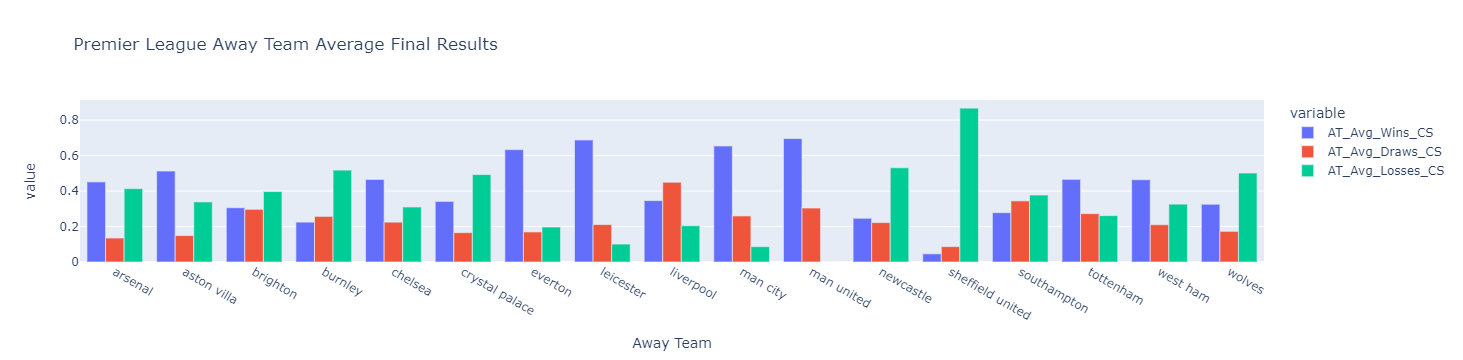

In [47]:
group_result_at = df_test.groupby(['Div', 'Away Team']).mean()[['AT_Avg_Wins_CS', 'AT_Avg_Draws_CS', 'AT_Avg_Losses_CS']].reset_index(drop=False)

premier_league_results = group_result_at.query('Div=="E0"')

px.bar(premier_league_results.set_index('Away Team'), 
       y=['AT_Avg_Wins_CS', 'AT_Avg_Draws_CS', 'AT_Avg_Losses_CS'], 
       title='Premier League Away Team Average Final Results', 
       barmode='group')

In [48]:
df_test.shape

(2599, 146)

In [14]:
df_test = pd.read_csv('df_test.csv')
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [15]:
df_test.shape

(2599, 147)

In [8]:
df_test.dtypes

Unnamed: 0                        int64
Div                              object
League                           object
Season                            int64
Date                     datetime64[ns]
                              ...      
AT_Avg_Losses                   float64
AT_Avg_Losses_CS                float64
AT_Avg_Losses_10Games           float64
AT_Avg_Losses_5Games            float64
AT_Avg_Losses_3Games            float64
Length: 147, dtype: object

## Performance Divergence

- Create features that represent performance drift based on the probability distributions of several stats between current and previous seasons.

127. Home Team Divergence Goals Scored (HT_Div_Goals_Scored)
128. Home Team Divergence Goals Conceded (HT_Div_Goals_Conceded)
129. Home Team Divergence Corners Taken (HT_Div_Corners_Taken)
130. Home Team Divergence Corners Allowed (HT_Div_Corners_Allowed)
131. Home Team Divergence Shots Taken (HT_Div_Shots_Taken)
132. Home Team Divergence Shots Allowed (HT_Div_Shots_Allowed)
133. Home Team Divergence Mean (HT_Div_Mean)

134. Away Team Divergence Goals Scored (AT_Div_Goals_Scored)
135. Away Team Divergence Goals Conceded (AT_Div_Goals_Conceded)
136. Away Team Divergence Corners Taken (AT_Div_Corners_Taken)
137. Away Team Divergence Corners Allowed (AT_Div_Corners_Allowed)
138. Away Team Divergence Shots Taken (AT_Div_Shots_Taken)
139. Away Team Divergence Shots Allowed (AT_Div_Shots_Allowed)
140. Away Team Divergence Mean (AT_Div_Mean)


In [16]:
df_test['HT_Div_Goals_Scored'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Home', stat='goals', 
                                               seasons=[19,20], scored_conceded='scored', axis=1)

df_test['HT_Div_Goals_Conceded'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Home', stat='goals', 
                                                 seasons=[19,20], scored_conceded='conceded', axis=1)

df_test['HT_Div_Corners_Taken'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Home', stat='corners', 
                                                seasons=[19,20], scored_conceded='scored', axis=1)

df_test['HT_Div_Corners_Allowed'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Home', stat='corners', 
                                                  seasons=[19,20], scored_conceded='conceded', axis=1)


df_test['HT_Div_Shots_Taken'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Home', stat='shots', 
                                              seasons=[19,20], scored_conceded='scored', axis=1)

df_test['HT_Div_Shots_Allowed'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Home', stat='shots', 
                                                seasons=[19,20], scored_conceded='conceded', axis=1)

df_test['HT_Div_Mean'] = df_test.eval('(HT_Div_Goals_Scored + HT_Div_Goals_Conceded + HT_Div_Corners_Taken + HT_Div_Corners_Allowed + HT_Div_Shots_Taken + HT_Div_Shots_Allowed) / 6')



df_test['AT_Div_Goals_Scored'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Away', stat='goals', 
                                               seasons=[19,20], scored_conceded='scored', axis=1)

df_test['AT_Div_Goals_Conceded'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Away', stat='goals', 
                                                 seasons=[19,20], scored_conceded='conceded', axis=1)

df_test['AT_Div_Corners_Taken'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Away', stat='corners', 
                                                seasons=[19,20], scored_conceded='scored', axis=1)

df_test['AT_Div_Corners_Allowed'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Away', stat='corners', 
                                                  seasons=[19,20], scored_conceded='conceded', axis=1)


df_test['AT_Div_Shots_Taken'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Away', stat='shots', 
                                              seasons=[19,20], scored_conceded='scored', axis=1)

df_test['AT_Div_Shots_Allowed'] = df_test.apply(FE.stats_divergence, df=df_hist, home_away='Away', stat='shots', 
                                                seasons=[19,20], scored_conceded='conceded', axis=1)

df_test['AT_Div_Mean'] = df_test.eval('(AT_Div_Goals_Scored + AT_Div_Goals_Conceded + AT_Div_Corners_Taken + AT_Div_Corners_Allowed + AT_Div_Shots_Taken + AT_Div_Shots_Allowed) / 6')



In [17]:
df_test.to_csv('/data/joaosilva/BetGuider/BetGuider/df_test_final.csv')

In [3]:
df_test = pd.read_csv('/data/joaosilva/BetGuider/BetGuider/df_test_final.csv')

In [5]:
df_test.shape

(2599, 162)

---

#### Testing BTS based on Goal Expectancy

In [41]:
y_true = df_test['BTS'].values

In [101]:
def pred_BTS(x, cs:bool, filter_:bool, number_games:int=None, thresh:float=1.0):
    if cs and not filter_:
        if number_games:
            if x[f'HT_G_Exp_{number_games}Games'] > thresh and x[f'AT_G_Exp_{number_games}Games'] > thresh:
                return 1
            else:
                return 0
        else:
            if x['HT_G_Exp_CS'] > thresh and x['AT_G_Exp_CS'] > thresh:
                return 1
            else:
                return 0
            
        
    elif cs and filter_:
        if number_games:
            if x[f'HT_G_Exp_{number_games}Games'] > thresh and x[f'AT_G_Exp_{number_games}Games'] > thresh and x['HT_G_Exp_CS'] > thresh and x['AT_G_Exp_CS'] > thresh:
                return 1
            else:
                return 0
        else: 
            if x['HT_G_Exp_CS'] > thresh and x['AT_G_Exp_CS'] > thresh:
                return 1
            else:
                return 0
            
    
    elif not cs and filter_:
        if number_games:
            if x[f'HT_G_Exp_{number_games}Games'] > thresh and x[f'AT_G_Exp_{number_games}Games'] > thresh and x['HT_G_Exp'] > thresh and x['AT_G_Exp'] > thresh:
                return 1
            else:
                return 0
        else:
            if x[f'HT_G_Exp_CS'] > thresh and x[f'AT_G_Exp_CS'] > thresh and x['HT_G_Exp'] > thresh and x['AT_G_Exp'] > thresh:
                return 1
            else:
                return 0
        
    elif not cs and not filter_:
        if x['HT_G_Exp'] > thresh and x['AT_G_Exp'] > thresh:
            return 1
        else:
            return 0
        
        
def pred_BTS_with_mean(x, cs:bool, filter_:bool, thresh:float=1.0):
    if filter_:
        if cs:
            if x[f'HT_G_Exp_CS-3Games'] > thresh and x[f'AT_G_Exp_CS-3Games'] > thresh and x['HT_G_Exp_CS'] > thresh and x['AT_G_Exp_CS'] > thresh:
                return 1
            else:
                return 0
        else:
            if x[f'HT_G_Exp_CS-3Games'] > thresh and x[f'AT_G_Exp_CS-3Games'] > thresh and x['HT_G_Exp'] > thresh and x['AT_G_Exp'] > thresh:
                return 1
            else:
                return 0
    else:
        if x['HT_G_Exp_CS-3Games'] > thresh and x['AT_G_Exp_CS-3Games'] > thresh:
            return 1
        else:
            return 0
        
        

In [98]:
#Predictions without filters
y_pred_all = df_test.apply(pred_BTS, cs=False, filter_=False, axis=1)
y_pred_cs = df_test.apply(pred_BTS, cs=True, filter_=False, axis=1)
y_pred_10 = df_test.apply(pred_BTS, cs=True, filter_=False, number_games=10, axis=1)
y_pred_5 = df_test.apply(pred_BTS, cs=True, filter_=False, number_games=5, axis=1)
y_pred_3 = df_test.apply(pred_BTS, cs=True, filter_=False, number_games=3, axis=1)
y_pred_mean = df_test.apply(pred_BTS_with_mean, cs=True, filter_=False, axis=1)

#Predictions with filters
y_pred_cs_filterAll =  df_test.apply(pred_BTS, cs=False, filter_=True, axis=1)
y_pred_10_filterAll = df_test.apply(pred_BTS, cs=False, filter_=True, number_games=10, axis=1)
y_pred_5_filterAll = df_test.apply(pred_BTS, cs=False, filter_=True, number_games=5, axis=1)
y_pred_3_filterAll = df_test.apply(pred_BTS, cs=False, filter_=True, number_games=3, axis=1)
y_pred_mean_filterAll = df_test.apply(pred_BTS_with_mean, cs=False, filter_=True, axis=1)

y_pred_cs_filterCS =  df_test.apply(pred_BTS, cs=True, filter_=True, axis=1)
y_pred_10_filterCS = df_test.apply(pred_BTS, cs=True, filter_=True, number_games=10, axis=1)
y_pred_5_filterCS = df_test.apply(pred_BTS, cs=True, filter_=True, number_games=5, axis=1)
y_pred_3_filterCS = df_test.apply(pred_BTS, cs=True, filter_=True, number_games=3, axis=1)
y_pred_mean_filterCS = df_test.apply(pred_BTS_with_mean, cs=True, filter_=True, axis=1)


In [46]:
y_pred_always = np.ones(len(y_pred_cs))

In [47]:
y_pred_always

array([1., 1., 1., ..., 1., 1., 1.])

- Reference Precision

In [52]:
df_test.shape

(2599, 146)

In [51]:
cm = confusion_matrix(y_true, y_pred_always)

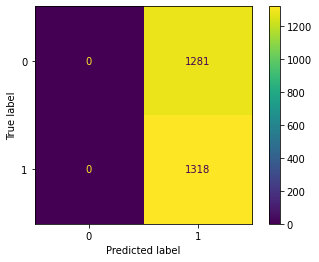

In [52]:
ConfusionMatrixDisplay(cm).plot()

In [53]:
precision_score(y_true, y_pred_always)

0.5071181223547518

- Analysis based on all seasons without filter

0.5298068849706129

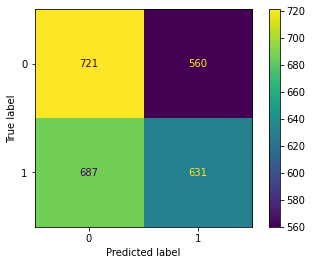

In [61]:
cm = confusion_matrix(y_true, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_all)

- Analysis based on current season without filter

0.5572354211663066

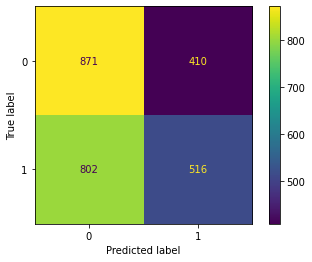

In [60]:
cm = confusion_matrix(y_true, y_pred_cs)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_cs)

- Analysis based on Last 10 Games without filter

0.5356294536817102

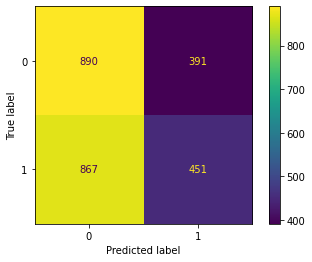

In [62]:
cm = confusion_matrix(y_true, y_pred_10)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_10)

- Analysis based on Last 5 Games without filter

0.5326409495548962

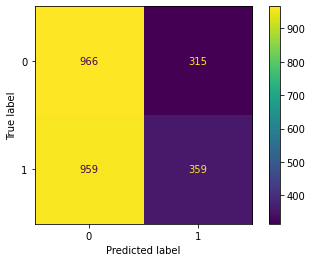

In [63]:
cm = confusion_matrix(y_true, y_pred_5)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_5)

- Analysis based on Last 3 Games without filter

0.5434412265758092

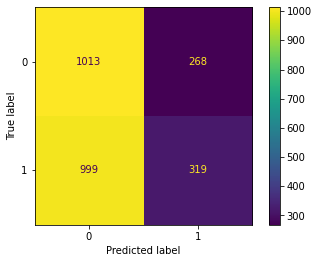

In [64]:
cm = confusion_matrix(y_true, y_pred_3)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_3)

- Analysis based on the mean between the Last 3 Games and the Current season

0.5412234042553191

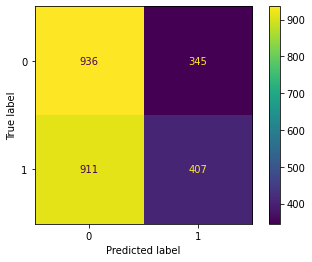

In [65]:
cm = confusion_matrix(y_true, y_pred_mean)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_mean)

**Filter All Seasons**

- Current season

0.5491573033707865

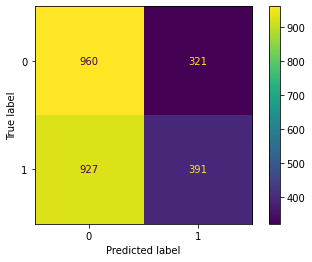

In [66]:
cm = confusion_matrix(y_true, y_pred_cs_filterAll)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_cs_filterAll)

- Last 10 Games

0.5292259083728278

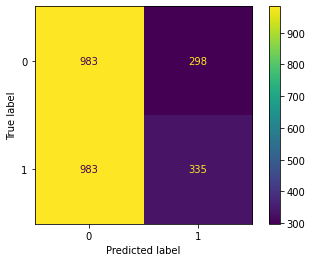

In [67]:
cm = confusion_matrix(y_true, y_pred_10_filterAll)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_10_filterAll)

- Last 5 Games

0.526431718061674

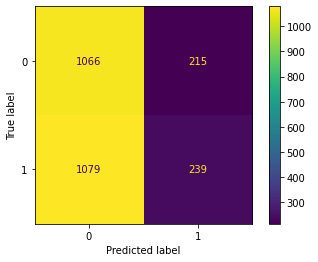

In [68]:
cm = confusion_matrix(y_true, y_pred_5_filterAll)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_5_filterAll)

- Last 3 Games

0.553763440860215

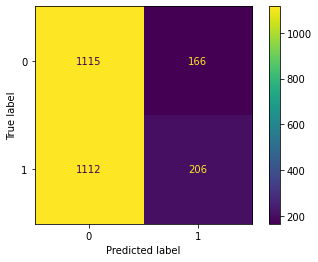

In [69]:
cm = confusion_matrix(y_true, y_pred_3_filterAll)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_3_filterAll)

- Mean

0.5391969407265774

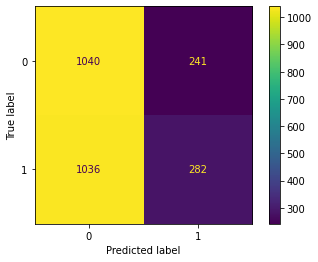

In [70]:
cm = confusion_matrix(y_true, y_pred_mean_filterAll)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_mean_filterAll)

**Filter Current Season**

- Last 10 Games

0.5368567454798331

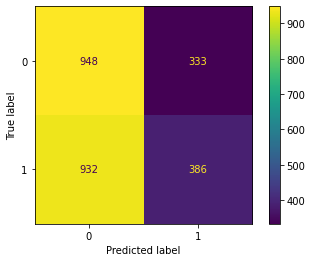

In [74]:
cm = confusion_matrix(y_true, y_pred_10_filterCS)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_10_filterCS)

- Last 5 Games

0.546236559139785

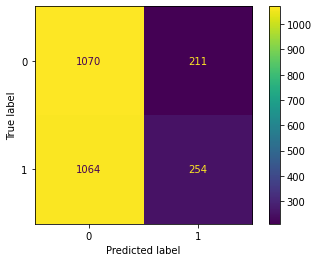

In [75]:
cm = confusion_matrix(y_true, y_pred_5_filterCS)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_5_filterCS)

- Last 3 Games

0.5786516853932584

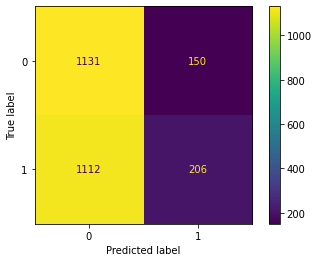

In [76]:
cm = confusion_matrix(y_true, y_pred_3_filterCS)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_3_filterCS)

- Mean

0.5472727272727272

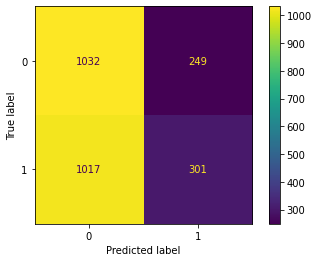

In [77]:
cm = confusion_matrix(y_true, y_pred_mean_filterCS)
ConfusionMatrixDisplay(cm).plot()
precision_score(y_true, y_pred_mean_filterCS)

### Tune the threshold hyperparameter

In [104]:
def thresh_tuner(df_test, pred_BTS, pred_BTS_with_mean, cs:bool, filter_:bool):
    precisions_cs = []
    precisions_10 = []
    precisions_5 = []
    precisions_3 = []
    precisions_mean = []
    total_cs = []
    total_10 = []
    total_5 = []
    total_3 = []
    total_mean = []
    for thresh in np.arange(0.9, 1.5, 0.1):
        y_pred_cs = df_test.apply(pred_BTS, cs=cs, filter_=filter_, thresh=thresh, axis=1)
        y_pred_10 = df_test.apply(pred_BTS, cs=cs, filter_=filter_, number_games=10, thresh=thresh, axis=1)
        y_pred_5 = df_test.apply(pred_BTS, cs=cs, filter_=filter_, number_games=5, thresh=thresh, axis=1)
        y_pred_3 = df_test.apply(pred_BTS, cs=cs, filter_=filter_, number_games=3, thresh=thresh, axis=1)
        y_pred_mean = df_test.apply(pred_BTS_with_mean, cs=cs, filter_=filter_, thresh=thresh, axis=1)
        for model, y_pred in zip(['cs', '10Games', '5Games', '3Games', 'Mean_CS_3Games'], 
                                 [y_pred_cs, y_pred_10, y_pred_5, y_pred_3, y_pred_mean]):
            
            (tn, fp, fn, tp) = confusion_matrix(y_true, y_pred).ravel()
            precision = tp/(tp+fp)
            
            if model == 'cs':
                precisions_cs.append(precision)
                total_cs.append(y_pred.sum()/len(y_pred))
            elif model == '10Games':
                precisions_10.append(precision)
                total_10.append(y_pred.sum()/len(y_pred))
            elif model == '5Games':
                precisions_5.append(precision)
                total_5.append(y_pred.sum()/len(y_pred))
            elif model == '3Games':
                precisions_3.append(precision)
                total_3.append(y_pred.sum()/len(y_pred))
            else:
                precisions_mean.append(precision)
                total_mean.append(y_pred.sum()/len(y_pred))
                
    # Create traces
    fig = go.Figure()
    x = np.arange(0.9, 1.5, 0.1)
    
    
    fig.add_trace(go.Scatter(x=x, y=precisions_cs,
                             name='precision cs',
                             line=dict(color='#ff7f0e', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_10,
                             name='precision 10',
                             line=dict(color='#2ca02c', width=4, dash='solid'),
                            ))
    fig.add_trace(go.Scatter(x=x, y=precisions_5,
                             name='precision 5',
                             line=dict(color='#d62728', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_3,
                             name='precision 3',
                             line=dict(color='#9467bd', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_mean,
                             name='precision mean',
                             line=dict(color='#8c564b', width=4, dash='solid'),
                             ))
    
    fig.add_trace(go.Scatter(x=x, y=total_cs,
                             name='total cs',
                             line=dict(color='#ff7f0e', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_10,
                             name='total 10',
                             line=dict(color='#2ca02c', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_5,
                             name='total 5',
                             line=dict(color='#d62728', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_3,
                             name='total 3',
                             line=dict(color='#9467bd', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_mean,
                             name='total mean',
                             line=dict(color='#8c564b', width=4, dash='dot')))
    
    
    fig.update_layout(title='Tuning Threshold',
                       xaxis_title='Thresholds',
                       yaxis_title='Percentage',
                       height=1000)
    
    fig.show()
        

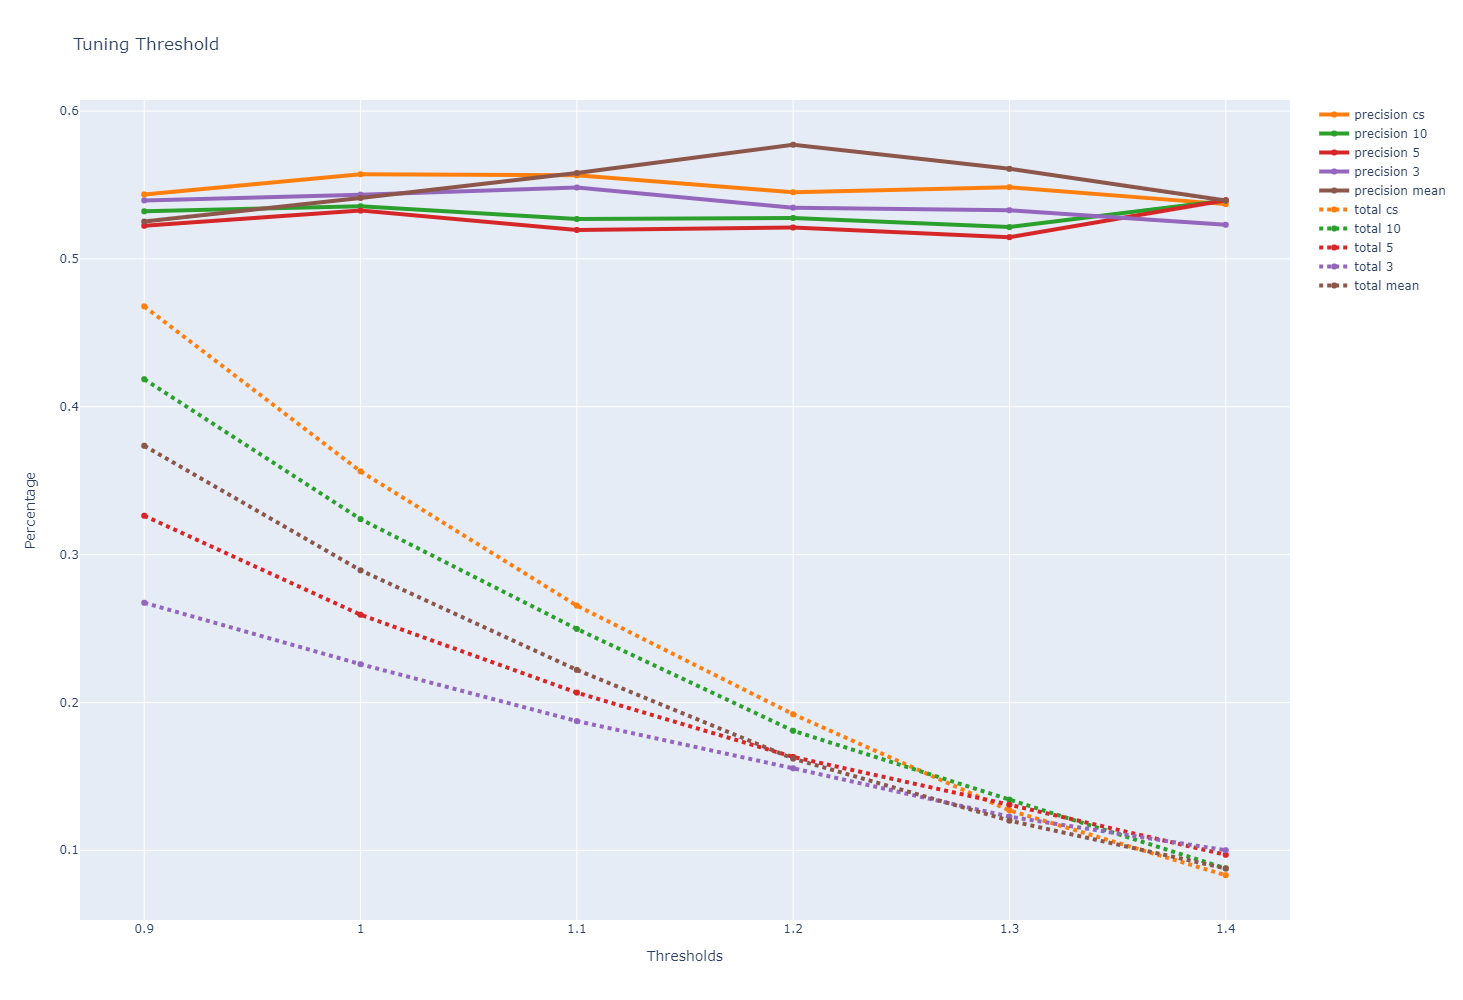

In [105]:
thresh_tuner(df_test, pred_BTS, pred_BTS_with_mean, cs=True, filter_=False)

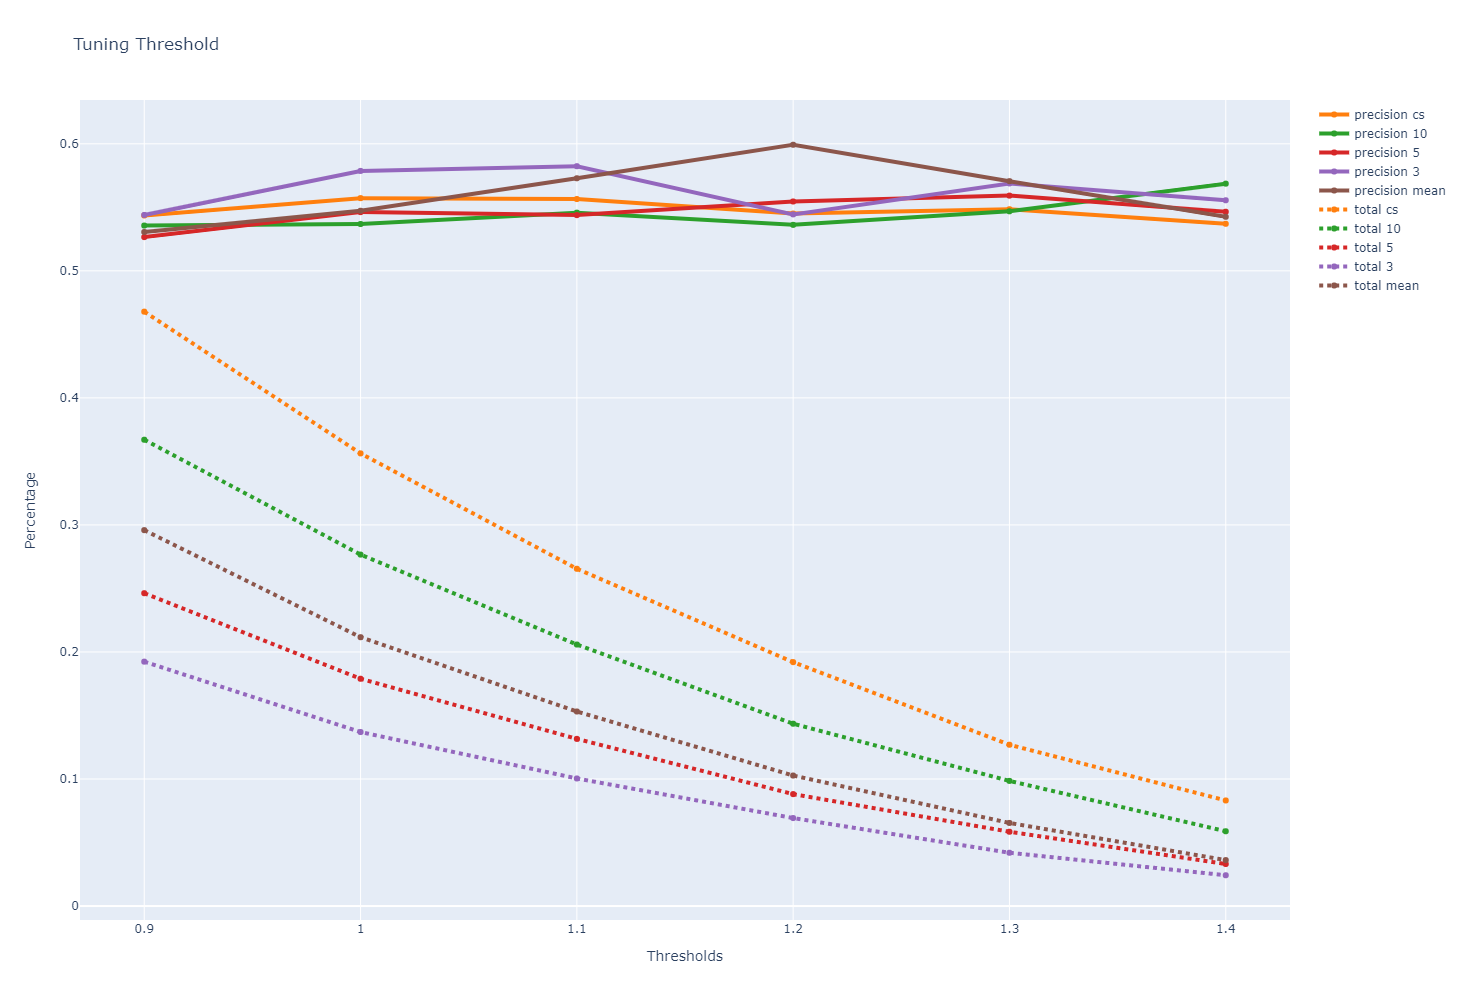

In [106]:
thresh_tuner(df_test, pred_BTS, pred_BTS_with_mean, cs=True, filter_=True)

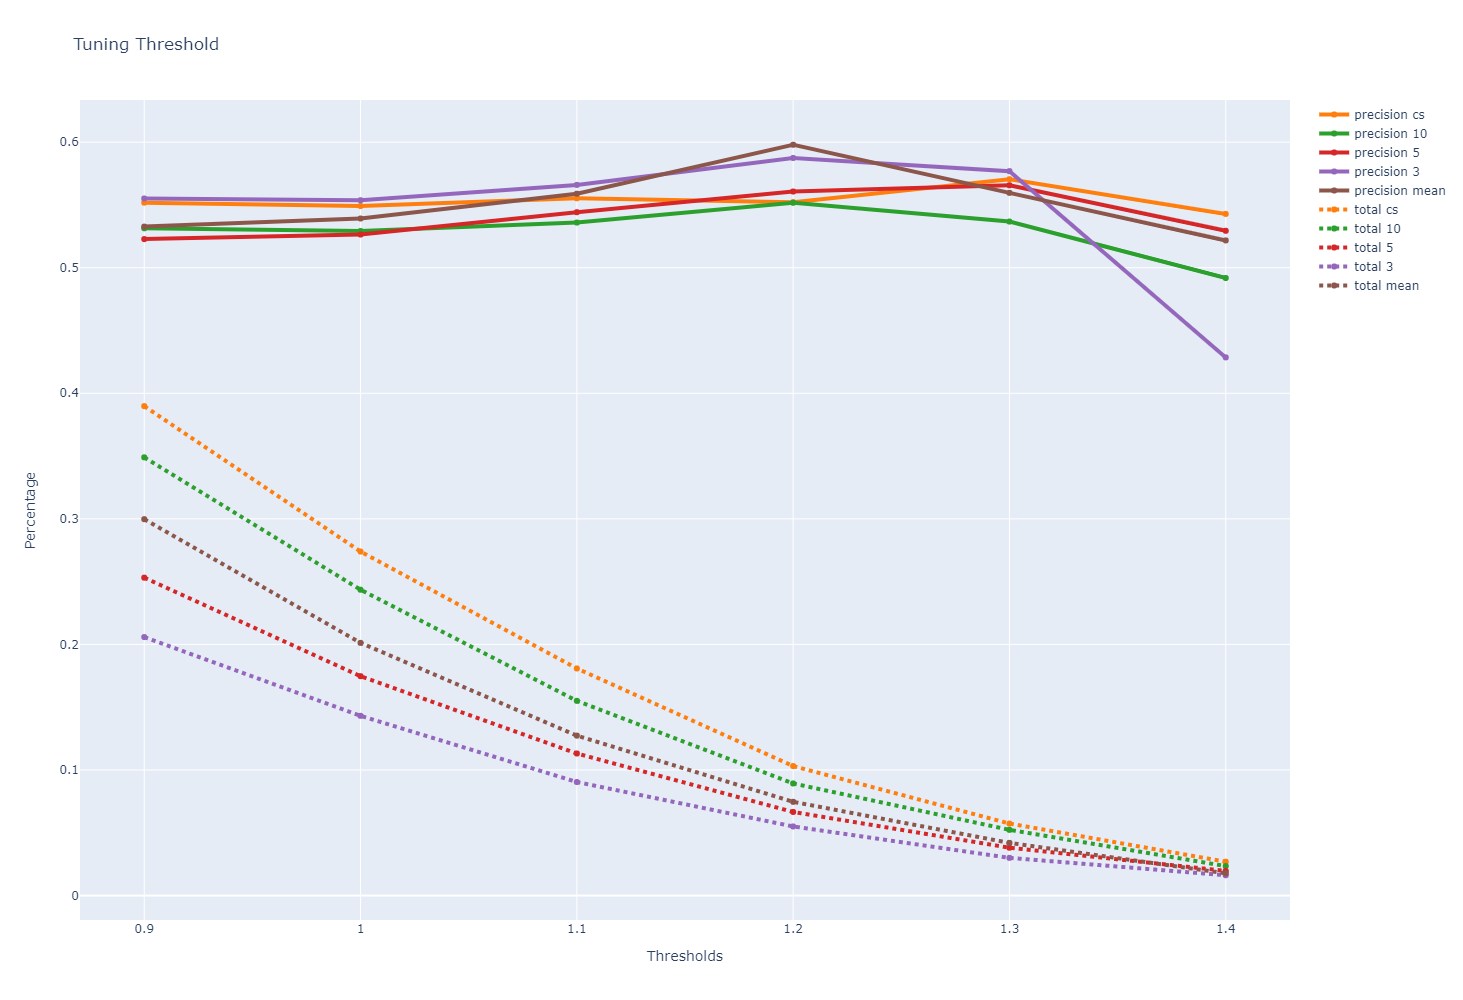

In [108]:
thresh_tuner(df_test, pred_BTS, pred_BTS_with_mean, cs=False, filter_=True)

#### Testing BTS Prediction based on Poisson Distribution

In [110]:
def BTS_probability(x, cs:bool, number_games:int=None, mean:bool=False):
    prob = 0
    if cs:
        if mean:
            col1 = 'HT_G_Exp_CS-3Games'
            col2 = 'AT_G_Exp_CS-3Games'
        elif number_games:
            col1 = f'HT_G_Exp_{number_games}Games'
            col2 = f'AT_G_Exp_{number_games}Games' 
        else:
            col1 = 'HT_G_Exp_CS'
            col2 = 'AT_G_Exp_CS' 
    else:
        col1 = 'HT_G_Exp'
        col2 = 'AT_G_Exp' 
        
    for i in range(1,6):
        for j in range(1,6):
            prob_ij = poisson.pmf(i,x[col1])*poisson.pmf(j,x[col2])
            prob += prob_ij
    
    return prob

df_test['BTS_Prob'] = df_test.apply(BTS_probability, cs=False, axis=1)
df_test['BTS_Prob_CS'] = df_test.apply(BTS_probability, cs=True, axis=1)
df_test['BTS_Prob_10Games'] = df_test.apply(BTS_probability, cs=True, number_games=10, axis=1)
df_test['BTS_Prob_5Games'] = df_test.apply(BTS_probability, cs=True, number_games=5, axis=1)
df_test['BTS_Prob_3Games'] = df_test.apply(BTS_probability, cs=True, number_games=3, axis=1)
df_test['BTS_Prob_CS-3Games'] = df_test.apply(BTS_probability, cs=True, number_games=None, mean=True, axis=1)

In [156]:
def poisson_thresh_tuner(df_test):
    precisions_all = []
    precisions_cs = []
    precisions_10 = []
    precisions_5 = []
    precisions_3 = []
    precisions_mean = []
    total_all = []
    total_cs = []
    total_10 = []
    total_5 = []
    total_3 = []
    total_mean = []
    for thresh in np.arange(0.3, 0.8, 0.05):
        y_pred_all = df_test['BTS_Prob'] >= thresh
        y_pred_cs = df_test['BTS_Prob_CS'] >= thresh
        y_pred_10 = df_test['BTS_Prob_10Games'] >= thresh
        y_pred_5 = df_test['BTS_Prob_5Games'] >= thresh
        y_pred_3 = df_test['BTS_Prob_3Games'] >= thresh
        y_pred_mean = df_test['BTS_Prob_CS-3Games'] >= thresh
        for model, y_pred in zip(['all', 'cs', '10Games', '5Games', '3Games', 'Mean_CS_3Games'], 
                                 [y_pred_all, y_pred_cs, y_pred_10, y_pred_5, y_pred_3, y_pred_mean]):
            
            (tn, fp, fn, tp) = confusion_matrix(y_true, y_pred).ravel()
            precision = tp/(tp+fp)
            if model == 'all':
                precisions_all.append(precision)
                total_all.append(y_pred.sum()/len(y_pred))
            elif model == 'cs':
                precisions_cs.append(precision)
                total_cs.append(y_pred.sum()/len(y_pred))
            elif model == '10Games':
                precisions_10.append(precision)
                total_10.append(y_pred.sum()/len(y_pred))
            elif model == '5Games':
                precisions_5.append(precision)
                total_5.append(y_pred.sum()/len(y_pred))
            elif model == '3Games':
                precisions_3.append(precision)
                total_3.append(y_pred.sum()/len(y_pred))
            else:
                precisions_mean.append(precision)
                total_mean.append(y_pred.sum()/len(y_pred))
                
    # Create traces
    fig = go.Figure()
    x = np.arange(0.3, 0.8, 0.05)
    
    
    fig.add_trace(go.Scatter(x=x, y=precisions_all,
                             name='precision all',
                             line=dict(color='#17becf', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_cs,
                             name='precision cs',
                             line=dict(color='#ff7f0e', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_10,
                             name='precision 10',
                             line=dict(color='#2ca02c', width=4, dash='solid'),
                            ))
    fig.add_trace(go.Scatter(x=x, y=precisions_5,
                             name='precision 5',
                             line=dict(color='#d62728', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_3,
                             name='precision 3',
                             line=dict(color='#9467bd', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_mean,
                             name='precision mean',
                             line=dict(color='#8c564b', width=4, dash='solid'),
                             ))
    
    fig.add_trace(go.Scatter(x=x, y=total_all,
                             name='total all',
                             line=dict(color='#17becf', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_cs,
                             name='total cs',
                             line=dict(color='#ff7f0e', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_10,
                             name='total 10',
                             line=dict(color='#2ca02c', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_5,
                             name='total 5',
                             line=dict(color='#d62728', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_3,
                             name='total 3',
                             line=dict(color='#9467bd', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_mean,
                             name='total mean',
                             line=dict(color='#8c564b', width=4, dash='dot')))
    
    
    fig.update_layout(title='Tuning Threshold',
                       xaxis_title='Thresholds',
                       yaxis_title='Percentage',
                       height=1000)
    
    fig.show()

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning:

invalid value encountered in long_scalars



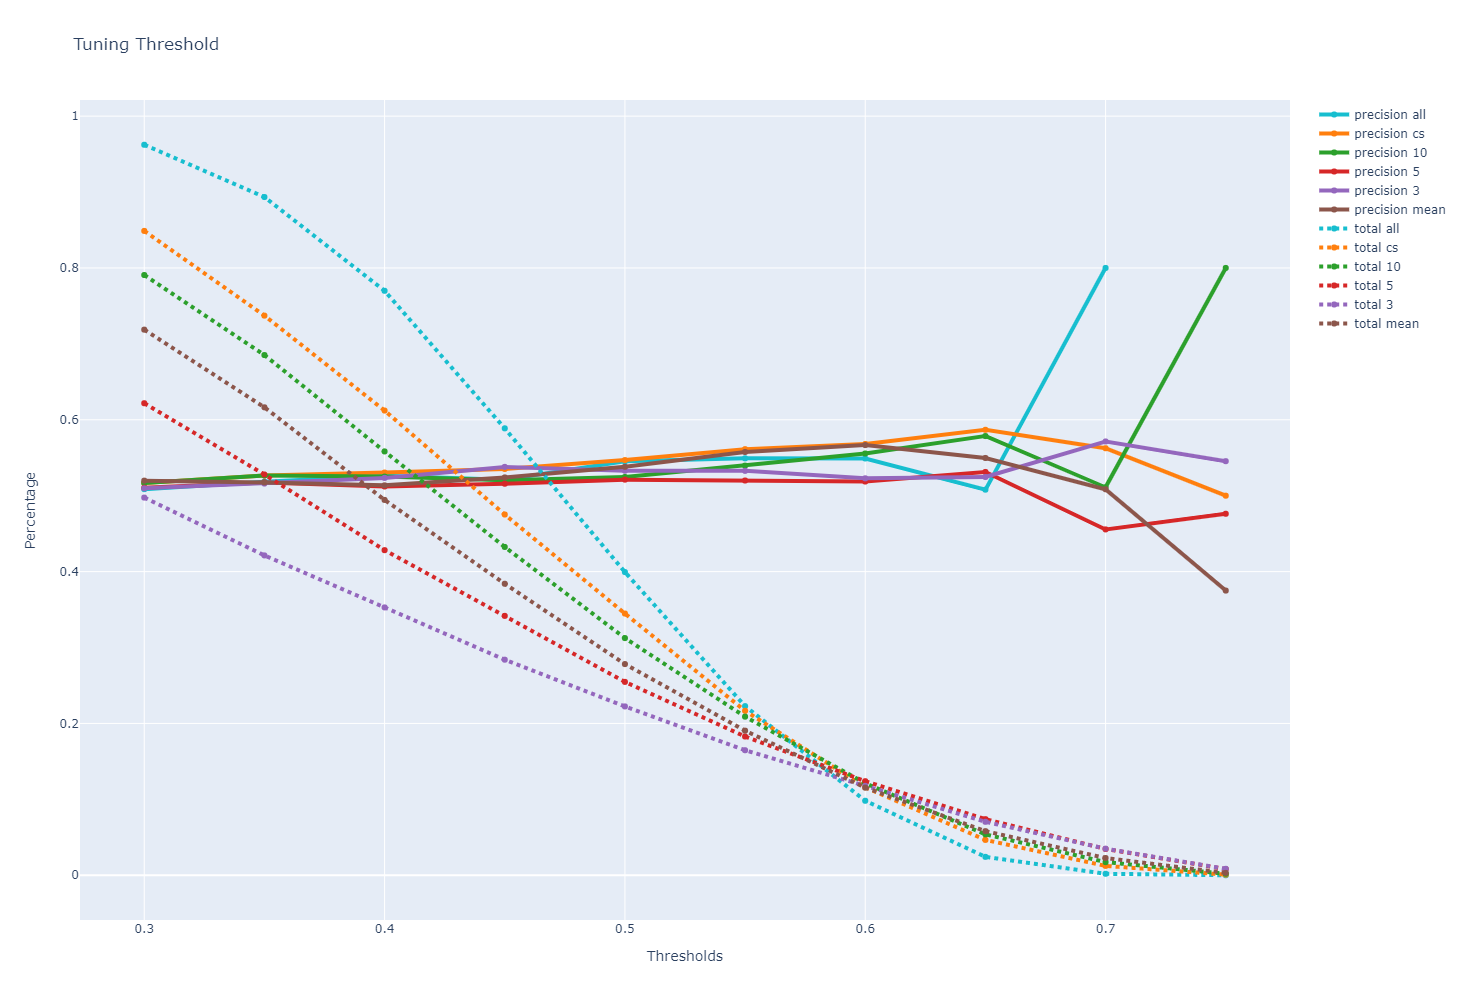

In [159]:
poisson_thresh_tuner(df_test)

#### Testing Draw Probability based on Poisson Distribution

In [6]:
y_true = df_test['Draw'].values

- Reference

In [176]:
y_pred_draw_always = np.ones(df_test.shape[0])
precision_score(y_true, y_pred_draw_always)

0.26279338207002695

In [177]:
def draw_probability(x, cs:bool, number_games:int=None, mean:bool=False):
    prob = 0
    if cs:
        if mean:
            col1 = 'HT_G_Exp_CS-3Games'
            col2 = 'AT_G_Exp_CS-3Games'
        elif number_games:
            col1 = f'HT_G_Exp_{number_games}Games'
            col2 = f'AT_G_Exp_{number_games}Games' 
        else:
            col1 = 'HT_G_Exp_CS'
            col2 = 'AT_G_Exp_CS' 
    else:
        col1 = 'HT_G_Exp'
        col2 = 'AT_G_Exp' 
        
    for i in range(0,7):
        j=i
        prob_ij = poisson.pmf(i,x[col1])*poisson.pmf(j,x[col2])
        prob += prob_ij
    
    return prob

df_test['Draw_Prob'] = df_test.apply(draw_probability, cs=False, axis=1)
df_test['Draw_Prob_CS'] = df_test.apply(draw_probability, cs=True, axis=1)
df_test['Draw_Prob_10Games'] = df_test.apply(draw_probability, cs=True, number_games=10, axis=1)
df_test['Draw_Prob_5Games'] = df_test.apply(draw_probability, cs=True, number_games=5, axis=1)
df_test['Draw_Prob_3Games'] = df_test.apply(draw_probability, cs=True, number_games=3, axis=1)
df_test['Draw_Prob_CS-3Games'] = df_test.apply(draw_probability, cs=True, number_games=None, mean=True, axis=1)

In [178]:
def draw_poisson_thresh_tuner(df_test):
    precisions_all = []
    precisions_cs = []
    precisions_10 = []
    precisions_5 = []
    precisions_3 = []
    precisions_mean = []
    total_all = []
    total_cs = []
    total_10 = []
    total_5 = []
    total_3 = []
    total_mean = []
    for thresh in np.arange(0.2, 0.6, 0.05):
        y_pred_all = df_test['Draw_Prob'] >= thresh
        y_pred_cs = df_test['Draw_Prob_CS'] >= thresh
        y_pred_10 = df_test['Draw_Prob_10Games'] >= thresh
        y_pred_5 = df_test['Draw_Prob_5Games'] >= thresh
        y_pred_3 = df_test['Draw_Prob_3Games'] >= thresh
        y_pred_mean = df_test['Draw_Prob_CS-3Games'] >= thresh
        for model, y_pred in zip(['all', 'cs', '10Games', '5Games', '3Games', 'Mean_CS_3Games'], 
                                 [y_pred_all, y_pred_cs, y_pred_10, y_pred_5, y_pred_3, y_pred_mean]):
            
            (tn, fp, fn, tp) = confusion_matrix(y_true, y_pred).ravel()
            precision = tp/(tp+fp)
            if model == 'all':
                precisions_all.append(precision)
                total_all.append(y_pred.sum()/len(y_pred))
            elif model == 'cs':
                precisions_cs.append(precision)
                total_cs.append(y_pred.sum()/len(y_pred))
            elif model == '10Games':
                precisions_10.append(precision)
                total_10.append(y_pred.sum()/len(y_pred))
            elif model == '5Games':
                precisions_5.append(precision)
                total_5.append(y_pred.sum()/len(y_pred))
            elif model == '3Games':
                precisions_3.append(precision)
                total_3.append(y_pred.sum()/len(y_pred))
            else:
                precisions_mean.append(precision)
                total_mean.append(y_pred.sum()/len(y_pred))
                
    # Create traces
    fig = go.Figure()
    x = np.arange(0.2, 0.8, 0.05)
    
    
    fig.add_trace(go.Scatter(x=x, y=precisions_all,
                             name='precision all',
                             line=dict(color='#17becf', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_cs,
                             name='precision cs',
                             line=dict(color='#ff7f0e', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_10,
                             name='precision 10',
                             line=dict(color='#2ca02c', width=4, dash='solid'),
                            ))
    fig.add_trace(go.Scatter(x=x, y=precisions_5,
                             name='precision 5',
                             line=dict(color='#d62728', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_3,
                             name='precision 3',
                             line=dict(color='#9467bd', width=4, dash='solid'),
                             ))
    fig.add_trace(go.Scatter(x=x, y=precisions_mean,
                             name='precision mean',
                             line=dict(color='#8c564b', width=4, dash='solid'),
                             ))
    
    fig.add_trace(go.Scatter(x=x, y=total_all,
                             name='total all',
                             line=dict(color='#17becf', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_cs,
                             name='total cs',
                             line=dict(color='#ff7f0e', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_10,
                             name='total 10',
                             line=dict(color='#2ca02c', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_5,
                             name='total 5',
                             line=dict(color='#d62728', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_3,
                             name='total 3',
                             line=dict(color='#9467bd', width=4, dash='dot')))
    fig.add_trace(go.Scatter(x=x, y=total_mean,
                             name='total mean',
                             line=dict(color='#8c564b', width=4, dash='dot')))
    
    
    fig.update_layout(title='Tuning Threshold',
                       xaxis_title='Thresholds',
                       yaxis_title='Percentage',
                       height=1000)
    
    fig.show()

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning:

invalid value encountered in long_scalars

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning:

invalid value encountered in long_scalars

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning:

invalid value encountered in long_scalars



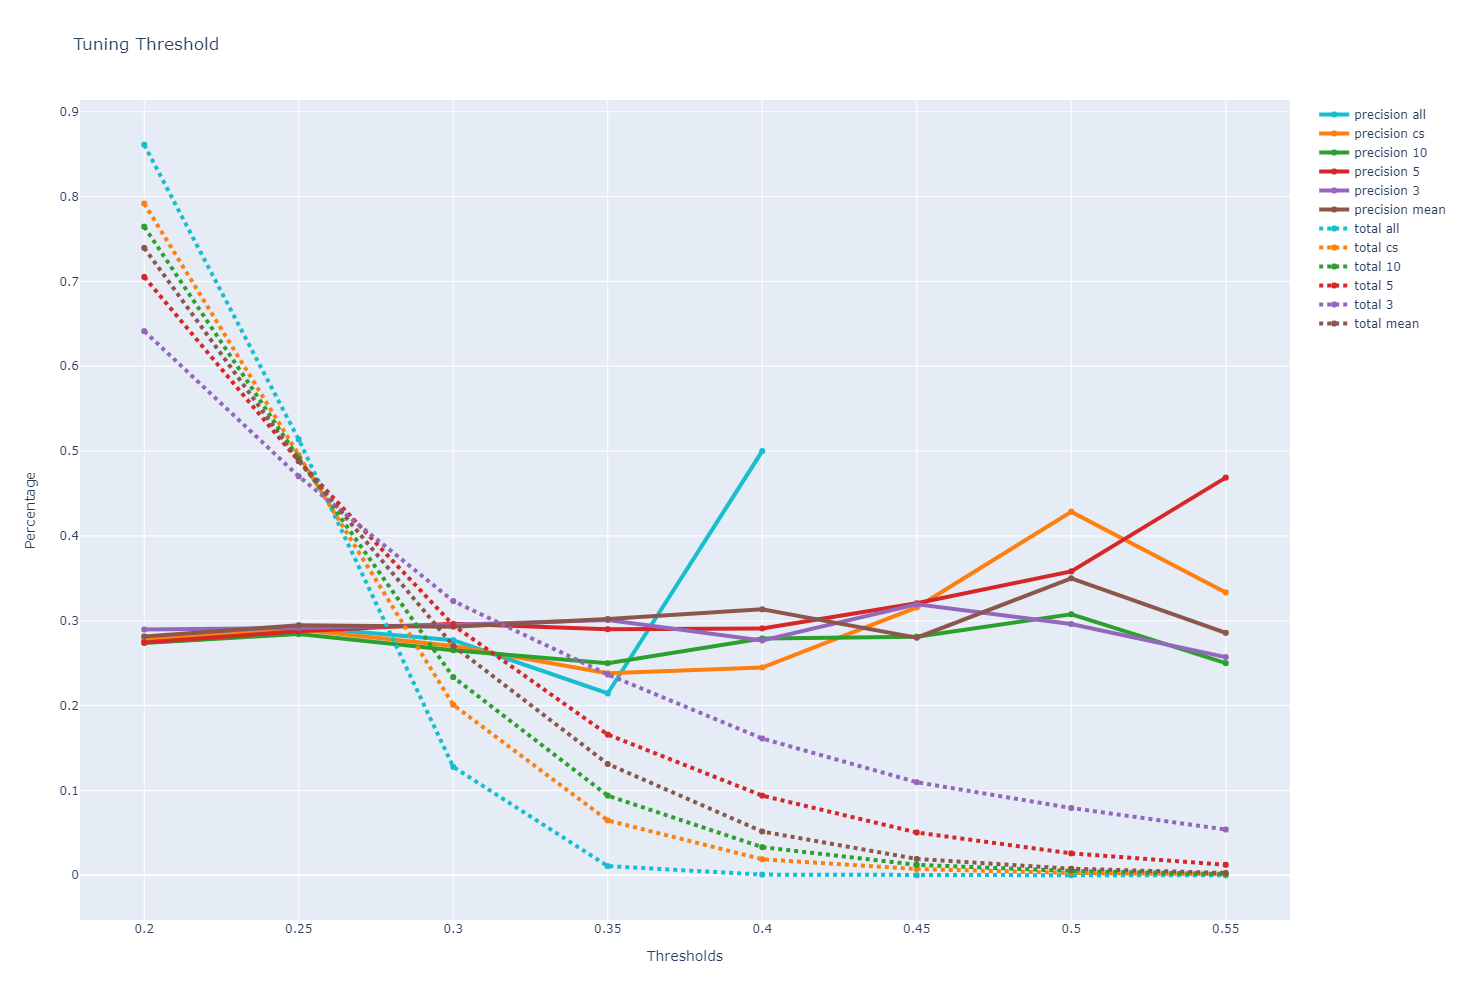

In [179]:
draw_poisson_thresh_tuner(df_test)

---

## Predict BTS and Draws using Machine Learning

In [7]:
#True BTS Labels
y_bts = df_test['BTS'].values
#True Draw Labels
y_draw = df_test['Draw'].values
#True Win Labels
y_win = df_test['Home Team Win'].values
#True Losses Labels
y_loss = df_test['Away Team Win'].values

In [8]:
X = df_test.drop(['Unnamed: 0', 'Div', 'League', 'Season', 'Date', 'Hour', 'Home Team', 
                  'Away Team', 'More_2.5', 'BTS', 'Home_Team_Promoted_Relegated', 'Away_Team_Promoted_Relegated',
                  'Home Team Win', 'Draw', 'Away Team Win', 'Home Goals', 'Away Goals', 'Home Shots Target',
                  'Home Corners', 'Away Corners'], axis=1).values

In [9]:
y_bts.shape, y_draw.shape, y_win.shape, y_loss.shape, X.shape

((2599,), (2599,), (2599,), (2599,), (2599, 142))

In [10]:
y_bts  = np.array([1 if v else 0 for v in y_bts])
y_draw = np.array([1 if v else 0 for v in y_draw])
y_win  = np.array([1 if v else 0 for v in y_win])
y_loss = np.array([1 if v else 0 for v in y_loss])

Looking on label balance in dataset

In [23]:
print('Labels: {}'.format(set(y_bts)))

Labels: {0, 1}


In [24]:
print('Labels: {}'.format(set(y_draw)))

Labels: {0, 1}


In [11]:
print('Zero Count = {}, One Count = {}'.format(len(y_bts)-y_bts.sum(), y_bts.sum()))

Zero Count = 1281, One Count = 1318


In [12]:
print('Zero Count = {}, One Count = {}'.format(len(y_draw)-y_draw.sum(), y_draw.sum()))

Zero Count = 1916, One Count = 683


In [13]:
print('Zero Count = {}, One Count = {}'.format(len(y_win)-y_win.sum(), y_win.sum()))

Zero Count = 1531, One Count = 1068


In [14]:
print('Zero Count = {}, One Count = {}'.format(len(y_loss)-y_loss.sum(), y_loss.sum()))

Zero Count = 1751, One Count = 848


**Train BTS**

In [15]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bts, test_size=0.2, stratify=y_bts)

In [16]:
X_train.shape, y_train.shape

((2079, 142), (2079,))

In [17]:
X_test.shape, y_test.shape

((520, 142), (520,))

### CatBoost

In [19]:
import catboost
print(catboost.__version__)

1.0.3


In [31]:
from catboost import CatBoostClassifier
from catboost import Pool
from catboost import MetricVisualizer

In [32]:
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

In [33]:
model = CatBoostClassifier(loss_function='Logloss', 
                           custom_loss=['AUC', 'Precision'],
                           eval_metric='Precision',  
                           train_dir='first_model', 
                           use_best_model=True,
                           learning_rate=0.005,
                           iterations=2000,
                           #early_stopping_rounds=500,
                          )
model.fit(train_pool, eval_set=test_pool, verbose=200)

0:	learn: 0.6104089	test: 0.6051136	best: 0.6051136 (0)	total: 89.7ms	remaining: 2m 59s
200:	learn: 0.6235294	test: 0.6011080	best: 0.6075581 (1)	total: 2.22s	remaining: 19.9s
400:	learn: 0.6661527	test: 0.6057143	best: 0.6075581 (1)	total: 3.84s	remaining: 15.3s
600:	learn: 0.7147410	test: 0.6046512	best: 0.6098266 (495)	total: 6.05s	remaining: 14.1s
800:	learn: 0.7643154	test: 0.6011730	best: 0.6098266 (495)	total: 8.16s	remaining: 12.2s
1000:	learn: 0.8029010	test: 0.6017964	best: 0.6098266 (495)	total: 10.5s	remaining: 10.5s
1200:	learn: 0.8346388	test: 0.6048632	best: 0.6098266 (495)	total: 13s	remaining: 8.62s
1400:	learn: 0.8627451	test: 0.6068111	best: 0.6098266 (495)	total: 14.7s	remaining: 6.3s
1600:	learn: 0.8959854	test: 0.6050157	best: 0.6105919 (1428)	total: 17s	remaining: 4.24s
1800:	learn: 0.9213691	test: 0.6069182	best: 0.6105919 (1428)	total: 19s	remaining: 2.1s
1999:	learn: 0.9456929	test: 0.6075949	best: 0.6119874 (1965)	total: 21.5s	remaining: 0us

bestTest = 0.611

In [34]:
MetricVisualizer(['first_model']).start()


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Cross Validation**

In [35]:
from catboost import cv

In [36]:
params = {'loss_function':'Logloss',
          'iterations':1500,
          'custom_loss':['AUC', 'Precision'],
          'learning_rate':0.0001,
         }

cv_data = cv(params=params,
             pool=train_pool,
             fold_count=5,
             shuffle=True,
             plot=True,
             verbose=False,
             stratified=False,
            )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.6822991741
bestIteration = 1499

Training on fold [1/5]

bestTest = 0.6842065839
bestIteration = 1499

Training on fold [2/5]


KeyboardInterrupt: 

In [32]:
cv_data.head()

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.692805          0.000182            0.692521   
1           1           0.692382          0.000209            0.691918   
2           2           0.691996          0.000237            0.691300   
3           3           0.691547          0.000290            0.690662   
4           4           0.691173          0.000324            0.690109   

   train-Logloss-std  test-AUC-mean  test-AUC-std  test-Precision-mean  \
0           0.000065       0.585543      0.042112             0.575054   
1           0.000106       0.614489      0.035432             0.572170   
2           0.000141       0.635678      0.031381             0.599158   
3           0.000136       0.643880      0.033016             0.596043   
4           0.000171       0.644990      0.032387             0.600218   

   test-Precision-std  train-Precision-mean  train-Precision-std  
0            0.057788              0.628339             0.031015  
1            0.036561              0.612016             0.039889  
2            0.045251              0.626377             0.014572  
3            0.046146              0.623729             0.010171  
4            0.048994              0.617079             0.007704

**Randomized Search**

In [114]:
param_grid = {
    'iterations':np.arange(20,3000, 40),
    'learning_rate':np.arange(0.001, 0.05, 0.002),
    'depth':np.arange(4, 10, 1),
    'l2_leaf_reg':np.arange(0.1, 1, 0.1),
    'random_strength':np.arange(1,10,1),
    'bagging_temperature':np.arange(0,100,10),
              }

model = CatBoostClassifier()

random_search = RandomizedSearchCV(
                    estimator=model,
                    param_distributions=param_grid,
                    n_iter=200,
                    scoring='precision',
                    n_jobs=-1)

random_search.fit(X_train, y_train)


0:	learn: 0.6931034	total: 3.66ms	remaining: 7.25s
1:	learn: 0.6930607	total: 7.31ms	remaining: 7.22s
2:	learn: 0.6930168	total: 10.7ms	remaining: 7.02s
3:	learn: 0.6929694	total: 13.7ms	remaining: 6.79s
4:	learn: 0.6929185	total: 16.4ms	remaining: 6.46s
5:	learn: 0.6928814	total: 19.1ms	remaining: 6.3s
6:	learn: 0.6928110	total: 22.2ms	remaining: 6.27s
7:	learn: 0.6927810	total: 25.1ms	remaining: 6.19s
8:	learn: 0.6927166	total: 28ms	remaining: 6.13s
9:	learn: 0.6926835	total: 30.7ms	remaining: 6.04s
10:	learn: 0.6926451	total: 33.6ms	remaining: 6.01s
11:	learn: 0.6926099	total: 36.5ms	remaining: 5.98s
12:	learn: 0.6925788	total: 39.8ms	remaining: 6.02s
13:	learn: 0.6925297	total: 42.9ms	remaining: 6.03s
14:	learn: 0.6924696	total: 45.9ms	remaining: 6.01s
15:	learn: 0.6924238	total: 48.7ms	remaining: 5.98s
16:	learn: 0.6924009	total: 51.6ms	remaining: 5.96s
17:	learn: 0.6923531	total: 54.4ms	remaining: 5.93s
18:	learn: 0.6923301	total: 56.9ms	remaining: 5.88s
19:	learn: 0.6922563	tota

RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000001E09694FAC8>,
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bagging_temperature': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'depth': array([4, 5, 6, 7, 8, 9]),
                                        'iterations': array([  20,   60,  100,  140,  180,  220,  260,  300,  340,  380,  420,
        460,  500,  540,  580,  620,  660,  700,  740,  780,  820,  860,
        900,  940,  980, 1020, 1060, 1...
       2220, 2260, 2300, 2340, 2380, 2420, 2460, 2500, 2540, 2580, 2620,
       2660, 2700, 2740, 2780, 2820, 2860, 2900, 2940, 2980]),
                                        'l2_leaf_reg': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.013, 0.015, 0.017,
       0.019, 0.021, 0.023, 0.025, 0.027, 0.029, 0.031, 0.033,

In [118]:
random_search.best_score_

0.5419223404589257

In [117]:
random_search.best_params_

{'random_strength': 4,
 'learning_rate': 0.003,
 'l2_leaf_reg': 0.1,
 'iterations': 1980,
 'depth': 4,
 'bagging_temperature': 50}

In [122]:
param_grid = {
    'depth':np.arange(2, 6, 1),
    'l2_leaf_reg':np.arange(0.01, 0.2, 0.02)
              }

model = CatBoostClassifier(iterations=2000,
                           learning_rate=0.003,
                           random_strength=4,
                           bagging_temperature=50,
                           verbose=False,
                           )

grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grid,
                    scoring='precision',
                    n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000001E097C90808>,
             n_jobs=-1,
             param_grid={'depth': array([2, 3, 4, 5]),
                         'l2_leaf_reg': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19])},
             scoring='precision')

In [123]:
grid_search.best_score_

0.5473232525217132

In [125]:
grid_search.best_params_

{'depth': 2, 'l2_leaf_reg': 0.049999999999999996}

In [158]:
model = CatBoostClassifier(loss_function='Logloss', 
                           custom_loss=['AUC', 'Precision'],
                           eval_metric='Precision',  
                           train_dir='tuned_model', 
                           use_best_model=True,
                           learning_rate=0.003,
                           iterations=2000,
                           random_strength=4,
                           bagging_temperature=50,
                           **grid_search.best_params_
                           #early_stopping_rounds=500,
                          )
model.fit(train_pool, eval_set=test_pool, verbose=100)

0:	learn: 0.5527124	test: 0.5258621	best: 0.5258621 (0)	total: 1.86ms	remaining: 3.71s
100:	learn: 0.5549618	test: 0.5398773	best: 0.5521472 (17)	total: 171ms	remaining: 3.21s
200:	learn: 0.5589623	test: 0.5541401	best: 0.5559105 (180)	total: 336ms	remaining: 3.01s
300:	learn: 0.5568000	test: 0.5602606	best: 0.5602606 (300)	total: 493ms	remaining: 2.79s
400:	learn: 0.5571543	test: 0.5536913	best: 0.5602606 (300)	total: 669ms	remaining: 2.67s
500:	learn: 0.5585875	test: 0.5514950	best: 0.5602606 (300)	total: 832ms	remaining: 2.49s
600:	learn: 0.5582329	test: 0.5585284	best: 0.5602606 (300)	total: 1s	remaining: 2.34s
700:	learn: 0.5599676	test: 0.5559322	best: 0.5604027 (603)	total: 1.17s	remaining: 2.18s
800:	learn: 0.5589910	test: 0.5627119	best: 0.5627119 (782)	total: 1.34s	remaining: 2.01s
900:	learn: 0.5622424	test: 0.5551724	best: 0.5627119 (782)	total: 1.51s	remaining: 1.84s
1000:	learn: 0.5617233	test: 0.5601375	best: 0.5627119 (782)	total: 1.68s	remaining: 1.68s
1100:	learn: 0.5

In [159]:
MetricVisualizer(['tuned_model']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Always predicting 1

In [58]:
y_ones = np.ones(len(y_test))

In [59]:
precision_score(y_test, y_ones)

0.5076923076923077

Precision

In [128]:
y_pred = model.predict(X_test)

precision_score(y_test, y_pred)

0.5627118644067797

In [129]:
cm = confusion_matrix(y_test, y_pred)

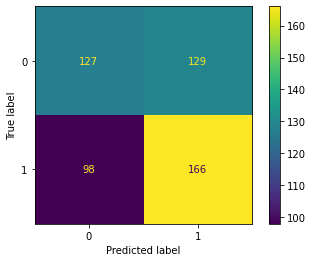

In [130]:
ConfusionMatrixDisplay(cm).plot()

Playing with the threshold

In [45]:
def threshold_tuning(model, X_test):
    precisions = []
    total_guesses = []
    rocs = []
    for thresh in np.arange(0.4, 0.8, 0.01):
        y_pred_P = np.array([1 if prob_ > thresh else 0 for prob_ in model.predict_proba(X_test)[:,1]])
        total_guesses.append(y_pred_P.sum()/len(y_pred_P))
        precisions.append(precision_score(y_test, y_pred_P))
        rocs.append(roc_auc_score(y_test, y_pred_P))
        
    # Create traces
    fig = go.Figure()
    x = np.arange(0.4, 0.8, 0.01)
    
    fig.add_trace(go.Scatter(x=x, y=precisions,
                             name='precision',
                             line=dict(color='firebrick', width=2)))
    fig.add_trace(go.Scatter(x=x, y=total_guesses,
                             name='total_guesses',
                             line=dict(color='royalblue', width=2)))
    fig.add_trace(go.Scatter(x=x, y=rocs,
                             name='roc',
                             line=dict(color='aquamarine', width=2)))
    
    fig.update_layout(title='Tuning Threshold',
                       xaxis_title='Thresholds',
                       yaxis_title='Percentage',
                       height=700,)
    
    fig.show()
        

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

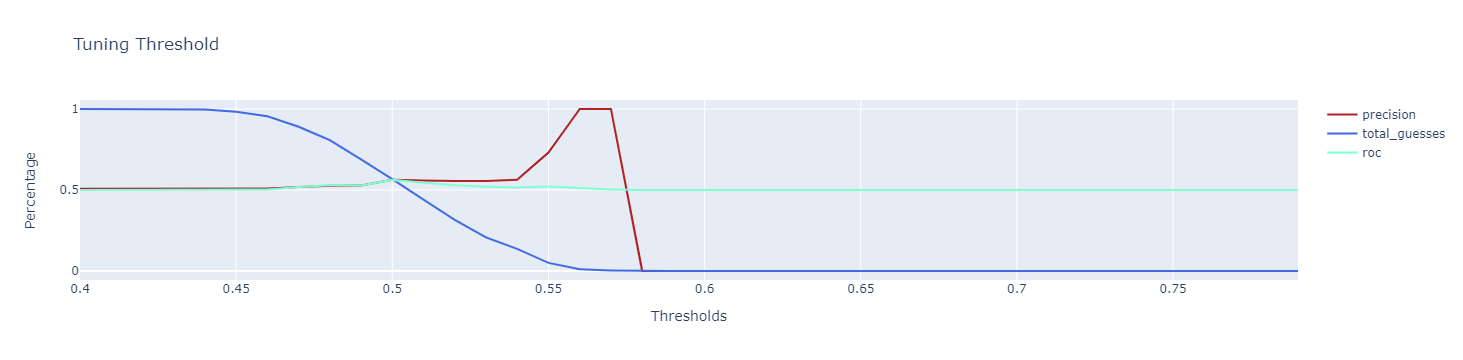

In [161]:
threshold_tuning(model, X_test)

In [133]:
import matplotlib.pyplot as plt
from catboost.utils import get_roc_curve
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

curve = get_roc_curve(model, test_pool)
(fpr, tpr, thresholds) = curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

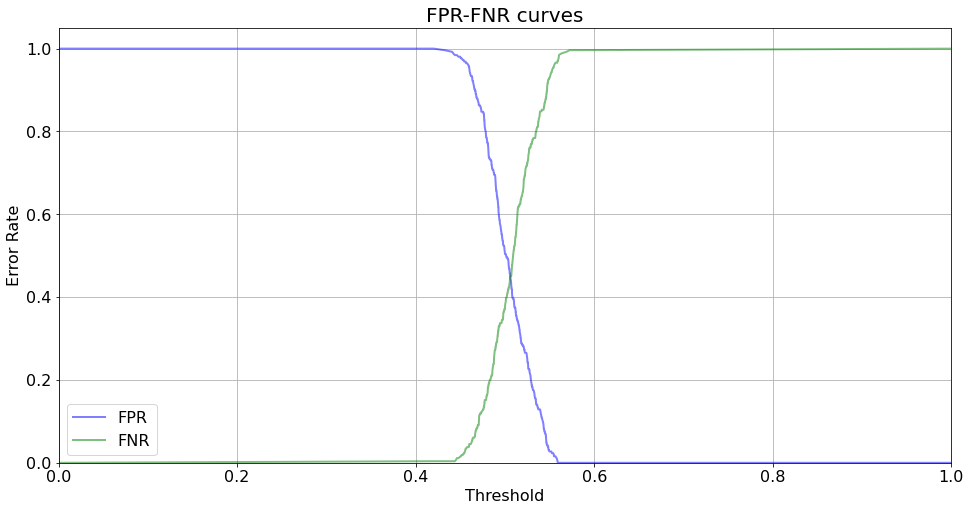

In [134]:
plt.figure(figsize=(16,8))
style = {'alpha':0.5, 'lw':2}

plt.plot(thresholds, fpr, color='blue', label='FPR', **style)
plt.plot(thresholds, fnr, color='green', label='FNR', **style)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc='lower left', fontsize=16)

In [135]:
metrics = model.eval_metrics(data=test_pool,
                             metrics=['Logloss', 'AUC', 'Precision'],
                             eval_period=10,
                             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Feature importances**

Prediction values change

In [136]:
feature_importance = np.array(model.get_feature_importance(prettified=True))

In [137]:
for i, x in enumerate(feature_importance):
    feature_importance[i][0] = columns[int(x[0])] 
    

In [138]:
feature_importance

array([['L_Avg_G_Sco_Away_CS', 9.999954328129721],
       ['AT_G_Exp_CS', 7.33154563013229],
       ['AT_Avg_G_Scored', 6.333402772663082],
       ['AT_G_Exp', 6.0287925046743025],
       ['L_Avg_G_Sco_Home_CS', 6.014764394551604],
       ['L_Avg_G_Sco_Home', 5.797099302887835],
       ['L_Avg_G_Sco_Away', 5.348575996937268],
       ['AT_Att_Strenght', 5.0880588309115655],
       ['AT_Avg_G_Conceded_CS', 4.6624018716762885],
       ['HT_Avg_G_Conceded_CS', 3.6761571271022886],
       ['AT_Att_Strenght_CS', 3.6217659256696004],
       ['AT_Avg_G_Scored_CS', 3.550870371433452],
       ['HT_Avg_G_Conceded_5Games', 3.421609730213022],
       ['HT_Avg_G_Scored_CS', 3.2287485040529247],
       ['HT_Att_Strenght_CS', 2.8585124346190787],
       ['HT_Avg_G_Conceded', 2.6670835263087773],
       ['AT_Avg_G_Scored_5Games', 2.41908600018048],
       ['AT_Def_Strenght', 2.064463998447943],
       ['HT_Att_Strenght', 1.997962663802109],
       ['HT_Def_Strenght_CS', 1.920611089272615],
       ['AT_

Loss Function Change

In [105]:
feature_importance = np.array(model.get_feature_importance(train_pool,
                                                           'LossFunctionChange',
                                                           prettified=True,))

In [107]:
for i, x in enumerate(feature_importance):
    feature_importance[i][0] = columns[int(x[0])] 
    
feature_importance

array([['HT_Avg_G_Conceded_5Games', 0.002950206071642869],
       ['L_Avg_G_Sco_Home_CS', 0.002900402450393247],
       ['AT_G_Exp', 0.002686356401453871],
       ['L_Avg_G_Sco_Away_CS', 0.002580095526752313],
       ['AT_G_Exp_CS', 0.0023711830360250152],
       ['AT_Att_Strenght', 0.0022308081845316963],
       ['AT_Avg_G_Scored', 0.0020575528875306226],
       ['AT_Avg_G_Conceded_CS', 0.0019877446726467296],
       ['AT_Def_Strenght_CS', 0.001978249013790734],
       ['HT_G_Exp_CS', 0.0018692678144635044],
       ['L_Avg_G_Sco_Home', 0.0018549179354944156],
       ['HT_Def_Strenght', 0.0017644494685858936],
       ['HT_Avg_G_Scored_CS', 0.0017607613993601001],
       ['HT_Avg_G_Conceded', 0.0017599835107467987],
       ['AT_Def_Strenght', 0.0017402932383270286],
       ['AT_Att_Strenght_CS', 0.0017230317426309982],
       ['AT_Avg_G_Conceded', 0.0016030895969223469],
       ['L_Avg_G_Sco_Away', 0.0015979665832148715],
       ['HT_Att_Strenght_CS', 0.001503986748572994],
       ['AT_

**Shap Values**

Shap

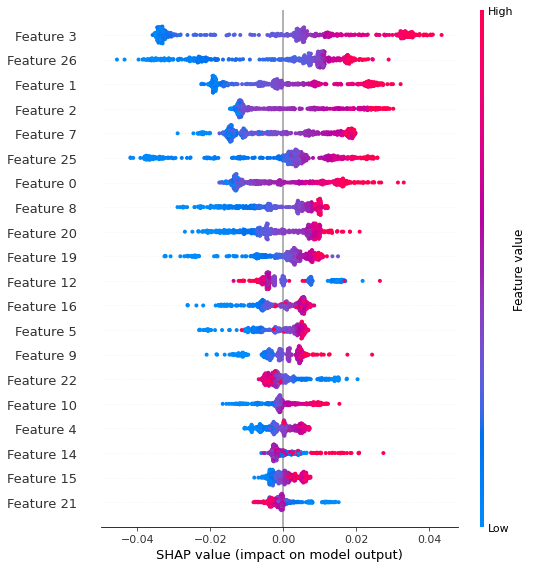

In [139]:
import shap
shap_values = model.get_feature_importance(test_pool, 'ShapValues')
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_test)

### XGBoost

In [33]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)
precision_score(y_test, y_pred)

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5970695970695971

In [34]:
scl = preprocessing.StandardScaler()
xgb_cl = xgb.XGBClassifier()

clf = pipeline.Pipeline([('scaling', scl), ('model', xgb_cl)])

clf.fit(X_train, y_train)

/home/caa_user/.conda/envs/doc_reader/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [35]:
y_pred = clf.predict(X_test)

precision_score(y_test, y_pred)

0.5970695970695971

In [143]:
param_grid = {
    'model__learning_reate':np.arange(0.01,0.3, 0.02),
    'model__gamma':np.arange(0, 1, 0.1),
    'model__reg_alpha':np.arange(0, 1, 0.1),
    'model__reg_lambda':np.arange(0, 1, 0.1),
    'model__max_depth':np.arange(1,20,1),
    'model__subsample':np.arange(0.1, 0.9, 0.1),
    'model__colsample_bytree':np.arange(0.3, 0.9, 0.1),
    
}

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=200,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_reate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_categorical=False,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type=None,
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                   

In [144]:
model.best_score_

0.5450774377308719

In [146]:
model.best_params_

{'model__subsample': 0.6,
 'model__reg_lambda': 0.30000000000000004,
 'model__reg_alpha': 0.5,
 'model__max_depth': 13,
 'model__learning_reate': 0.10999999999999997,
 'model__gamma': 0.9,
 'model__colsample_bytree': 0.4}

In [149]:
param_grid = {
    'model__learning_reate':np.arange(0.09,0.1, 0.11),
    'model__reg_alpha':(0.4, 0.5, 0.6),
    'model__max_depth':(10,12,14,16),   
    'model__subsample': [0.6],
    'model__reg_alpha': [0.5],
    'model__gamma': [0.9],
    'model__colsample_bytree': [0.4]
            }

model = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_reate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      enable_categorical=False,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type=None,
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                                   

In [150]:
model.best_score_

0.544626916692058

In [154]:
scl = preprocessing.StandardScaler()
xgb_cl = xgb.XGBClassifier(subsample=0.6,
                           reg_lambda=0.3,
                           reg_alpha=0.5,
                           max_depth=13,
                           learning_reate=0.1,
                           gamma=0.9,
                           colsample_bytree=0.4)

clf = pipeline.Pipeline([('scaling', scl), ('model', xgb_cl)])
clf.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_reate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.4, enable_categorical=False,
                               gamma=0.9, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, learning_reate=0.1,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0.5, reg_lambda=0.3,
                               scale_pos_weight=1, subsample=0.6,
                               tree_method='exact', validate_parameters=

In [155]:
y_pred = clf.predict(X_test)

precision_score(y_test, y_pred)

0.5361216730038023

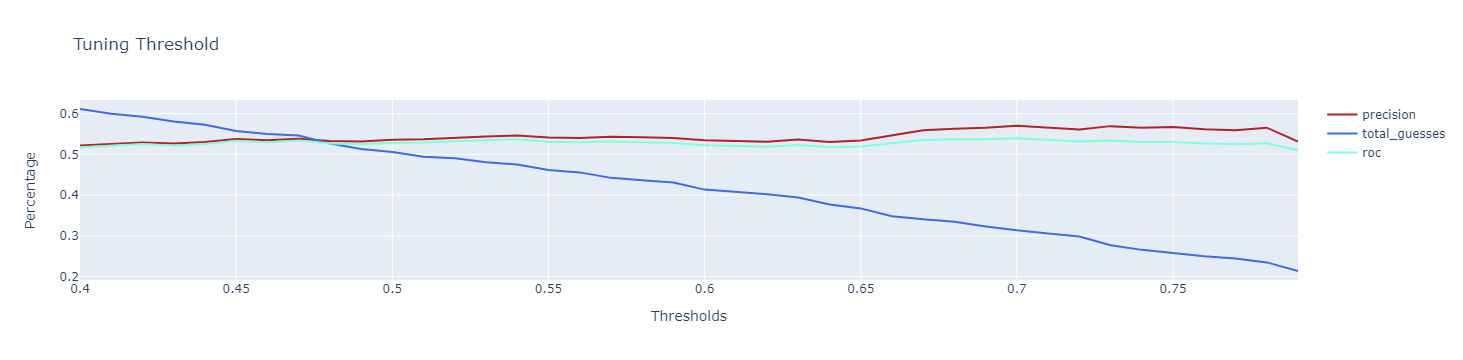

In [162]:
threshold_tuning(clf, X_test)

### Random Forest Classifier

In [27]:
def optimize(trial, x, y):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    n_estimators = trial.suggest_int('n_estimators', 100, 1500)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_samples = trial.suggest_uniform('max_samples', 0.1, 0.8)
    
    model = ensemble.RandomForestClassifier(
        criterion = criterion,
        n_estimators = n_estimators,
        max_depth = max_depth,
        max_features = max_features,
        max_samples = max_samples
    )
    
    kf = StratifiedKFold(n_splits=5)
    precisions = []
    for train_idx, test_idx in kf.split(X=x, y=y):
        x_train = x[train_idx]
        y_train = y[train_idx]
        x_test = x[test_idx]
        y_test = y[test_idx]
        
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        precision_fold = precision_score(y_test, preds)
        precisions.append(precision_fold)
    
    return np.mean(precisions)
        
    
    
    

In [28]:
study = optuna.create_study(direction='maximize')
optimization_function = partial(optimize, x=X_train, y=y_train)
study.optimize(optimization_function, n_trials=15)

[I 2022-01-12 23:57:08,148] A new study created in memory with name: no-name-fb175564-cda5-4885-b56f-265cbeb6e92e
[I 2022-01-12 23:57:28,006] Trial 0 finished with value: 0.5808711860925554 and parameters: {'criterion': 'entropy', 'n_estimators': 878, 'max_depth': 17, 'max_features': 'sqrt', 'max_samples': 0.14774739052948552}. Best is trial 0 with value: 0.5808711860925554.
[I 2022-01-12 23:57:48,428] Trial 1 finished with value: 0.5677788145235548 and parameters: {'criterion': 'entropy', 'n_estimators': 968, 'max_depth': 8, 'max_features': 'log2', 'max_samples': 0.23781819293928438}. Best is trial 0 with value: 0.5808711860925554.
[I 2022-01-12 23:58:07,600] Trial 2 finished with value: 0.5664622390566414 and parameters: {'criterion': 'entropy', 'n_estimators': 1102, 'max_depth': 15, 'max_features': 'log2', 'max_samples': 0.1374937128790936}. Best is trial 0 with value: 0.5808711860925554.
[I 2022-01-12 23:58:31,675] Trial 3 finished with value: 0.5791937761304828 and parameters: {'c

In [30]:
study.best_value

0.5907842288241516

In [31]:
study.best_params

{'criterion': 'gini',
 'n_estimators': 1447,
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_samples': 0.48872520803611297}

In [34]:
rf = ensemble.RandomForestClassifier(**study.best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
precision_score(y_test, y_pred)


0.5972696245733788

0.6009706439393939

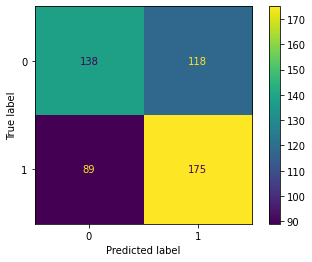

In [39]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
roc_auc_score(y_test, y_pred)

In [99]:
def threshold_tuning(model, X_test, y_test, thresh_dist, bet_size=100, odd=2):
    precisions = []
    total_guesses = []
    rocs = []
    amount_spent = []
    amount_won = []
    gains = []
    for thresh in thresh_dist:
        y_pred_P = np.array([1 if prob_ > thresh else 0 for prob_ in model.predict_proba(X_test)[:,1]])
        number_guesses = y_pred_P.sum()/len(y_pred_P)
        total_guesses.append(number_guesses)
        amount_spent.append(money_spent)
        precision = precision_score(y_test, y_pred_P)
        money_won = bet_size*odd*y_pred_P.sum()*precision
        gain = money_won - money_spent
        amount_won.append(money_won)
        precisions.append(precision)
        gains.append(gain)
        rocs.append(roc_auc_score(y_test, y_pred_P))
        
    # Create traces
    fig = make_subplots(rows=2, cols=1,)
                        
    x = thresh_dist
    
    fig.add_trace(go.Scatter(x=x, y=precisions,
                             name='precision',
                             line=dict(color='firebrick', width=2)), row=1, col=1)
    fig.add_trace(go.Scatter(x=x, y=total_guesses,
                             name='total_guesses',
                             line=dict(color='royalblue', width=2)), row=1, col=1)
    fig.add_trace(go.Scatter(x=x, y=rocs,
                             name='roc',
                             line=dict(color='aquamarine', width=2)), row=1, col=1)
    fig.add_trace(go.Scatter(x=x, y=amount_spent,
                             name='Money Spent',
                             line=dict(color='firebrick', width=2)), row=2, col=1)
    fig.add_trace(go.Scatter(x=x, y=amount_won,
                             name='Money Won',
                             line=dict(color='royalblue', width=2)), row=2, col=1)
    fig.add_trace(go.Scatter(x=x, y=gains,
                             name='Profit',
                             line=dict(color='aquamarine', width=4)), row=2, col=1)
    
    
    fig.update_layout(title='Tuning Threshold',
                       xaxis_title='Thresholds',
                       yaxis_title='Percentage',
                       height=700,)
    
    fig.show()

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ca

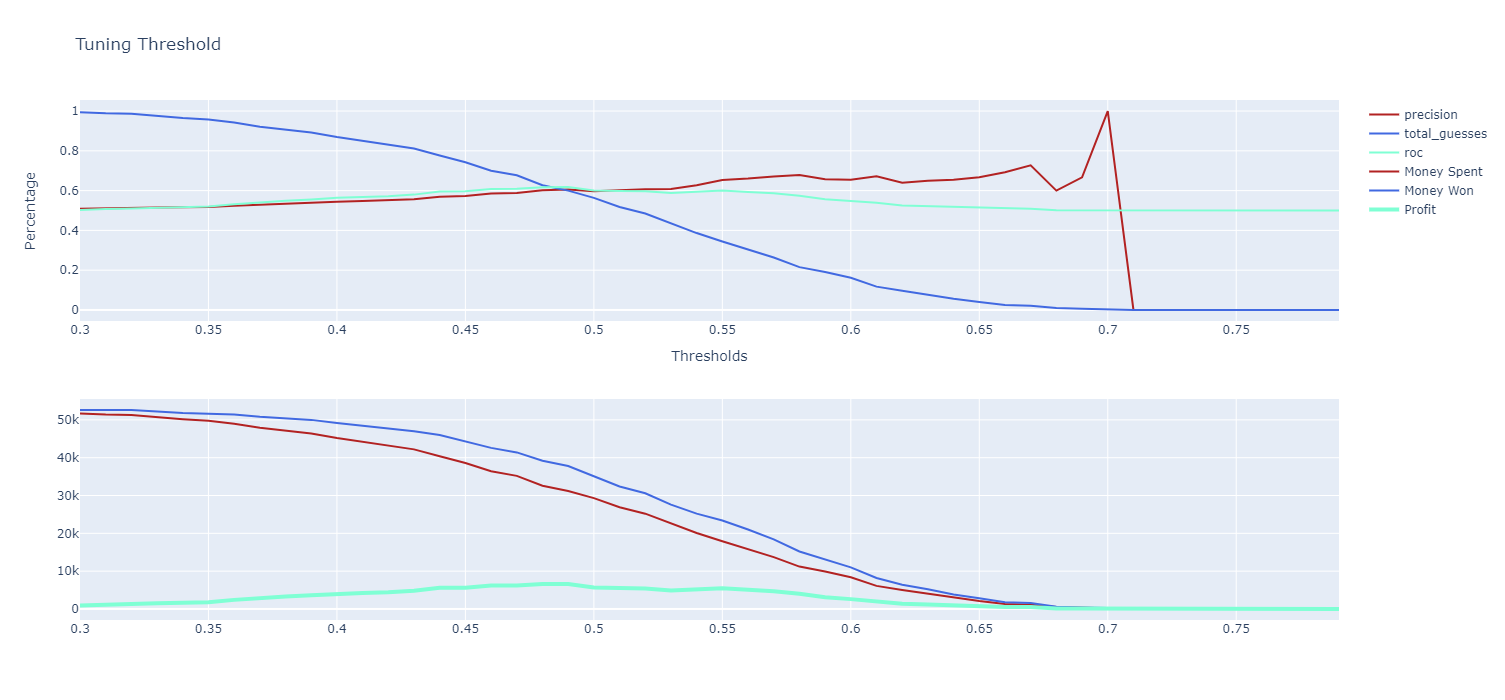

In [65]:
threshold_tuning(rf, X_test, np.arange(0.3, 0.8, 0.01), bet_size=100)

### Logistic Regression

In [51]:
scl = preprocessing.StandardScaler()
lr = LogisticRegression()

clf = pipeline.Pipeline([('scaling', scl), ('model', lr)])

param_grid = {
    'model__penalty':['l1', 'l2', 'none'],
    'model__C':np.arange(0.1, 30, 0.2),
    'model__solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__max_iter':[100,200,300,400,500]
}

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=200,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


230 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_so

RandomizedSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model', LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__C': array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1...
       22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9, 24.1,
       24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1, 26.3,
       26.5, 26.7, 26.9, 27.1, 27.3, 27.5, 27.7, 27.9, 28.1, 28.3, 28.5,
       28.7, 28.9, 29.1, 29.3, 29.5, 29.7, 29.9]),
                                        'model__max_iter': [100, 200, 300, 400,
                                                            500],
                     

In [52]:
model.best_score_

0.5808097616138245

In [53]:
model.best_params_

{'model__solver': 'saga',
 'model__penalty': 'l1',
 'model__max_iter': 400,
 'model__C': 1.3000000000000003}

In [54]:
scl = preprocessing.StandardScaler()
lr = LogisticRegression()

clf = pipeline.Pipeline([('scaling', scl), ('model', lr)])

param_grid = {
    'model__penalty':['l1'],
    'model__C':np.arange(1, 5, 1),
    'model__solver':['saga'],
    'model__max_iter':[400, 500, 600]
}

model = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': array([1, 2, 3, 4]),
                         'model__max_iter': [400, 500, 600],
                         'model__penalty': ['l1'], 'model__solver': ['saga']},
             scoring='precision')

In [55]:
model.best_score_

0.5843514462824372

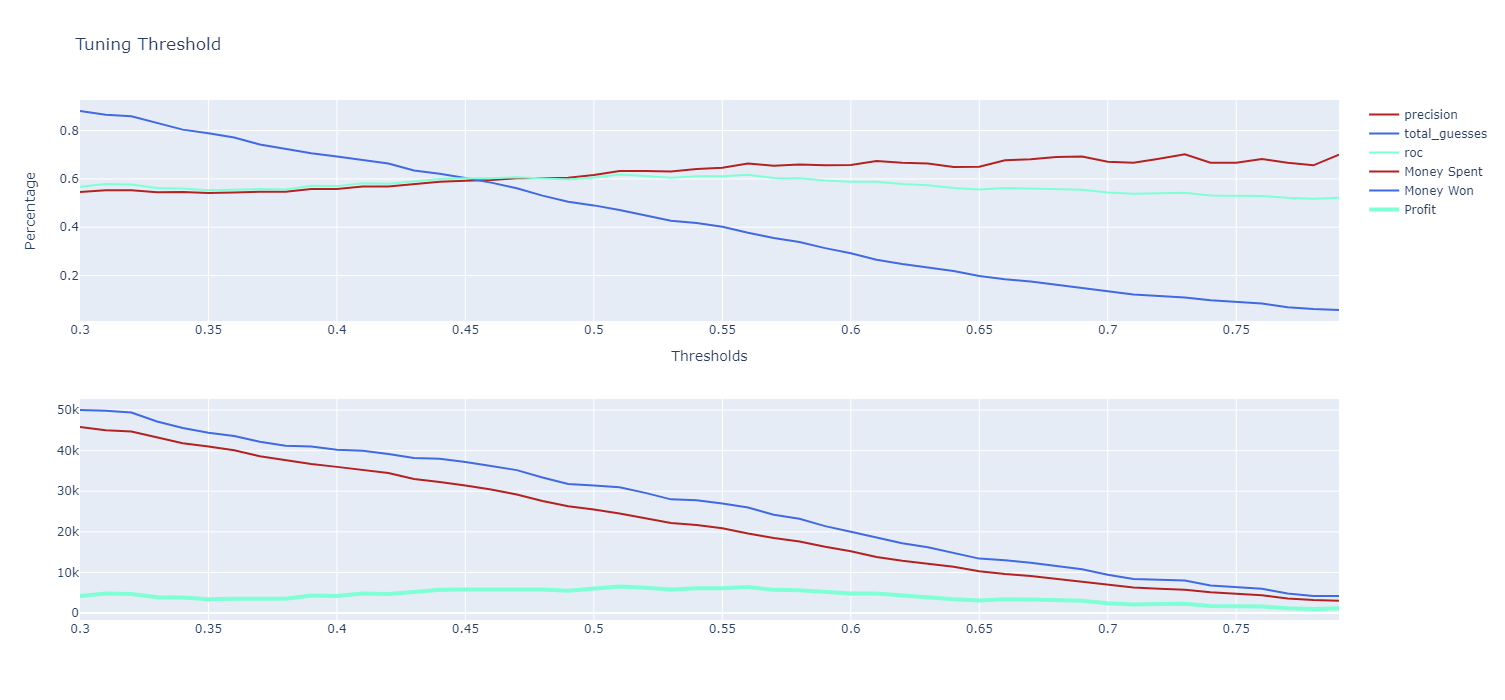

In [63]:
threshold_tuning(model.best_estimator_, X_test, np.arange(0.3, 0.8, 0.01), bet_size=100)

**Train Draw**

In [66]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y_draw, test_size=0.2, stratify=y_draw)

### RandomForest Classifier

In [68]:
def optimize(trial, x, y):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    n_estimators = trial.suggest_int('n_estimators', 100, 1500)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    max_samples = trial.suggest_uniform('max_samples', 0.1, 0.8)
    
    model = ensemble.RandomForestClassifier(
        criterion = criterion,
        n_estimators = n_estimators,
        max_depth = max_depth,
        max_features = max_features,
        max_samples = max_samples
    )
    
    kf = StratifiedKFold(n_splits=5)
    precisions = []
    for train_idx, test_idx in kf.split(X=x, y=y):
        x_train = x[train_idx]
        y_train = y[train_idx]
        x_test = x[test_idx]
        y_test = y[test_idx]
        
        model.fit(x_train, y_train)
        preds = np.array([1 if prob_ > 0.33 else 0 for prob_ in model.predict_proba(x_test)[:,1]])
        precision_fold = precision_score(y_test, preds)
        precisions.append(precision_fold)
    
    return np.mean(precisions)

In [69]:
study = optuna.create_study(direction='maximize')
optimization_function = partial(optimize, x=X_train, y=y_train)
study.optimize(optimization_function, n_trials=15)

[I 2022-01-13 00:58:44,167] A new study created in memory with name: no-name-f94889cd-8103-4b39-b5ee-987268c41a59
[I 2022-01-13 00:58:57,907] Trial 0 finished with value: 0.2742182077975097 and parameters: {'criterion': 'gini', 'n_estimators': 314, 'max_depth': 12, 'max_features': 'sqrt', 'max_samples': 0.784543338470218}. Best is trial 0 with value: 0.2742182077975097.
[I 2022-01-13 00:59:49,572] Trial 1 finished with value: 0.2723218020104012 and parameters: {'criterion': 'gini', 'n_estimators': 1279, 'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.6100225202618943}. Best is trial 0 with value: 0.2742182077975097.
[I 2022-01-13 00:59:58,820] Trial 2 finished with value: 0.2949715738349582 and parameters: {'criterion': 'gini', 'n_estimators': 401, 'max_depth': 20, 'max_features': 'sqrt', 'max_samples': 0.2702931391865915}. Best is trial 2 with value: 0.2949715738349582.
[I 2022-01-13 01:00:18,590] Trial 3 finished with value: 0.304340936809281 and parameters: {'criterion': '

In [ ]:
study.

In [74]:
study.best_value

0.3200906501892511

In [77]:
rf = ensemble.RandomForestClassifier(**study.best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       max_samples=0.13006379209017635, n_estimators=109)

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ca

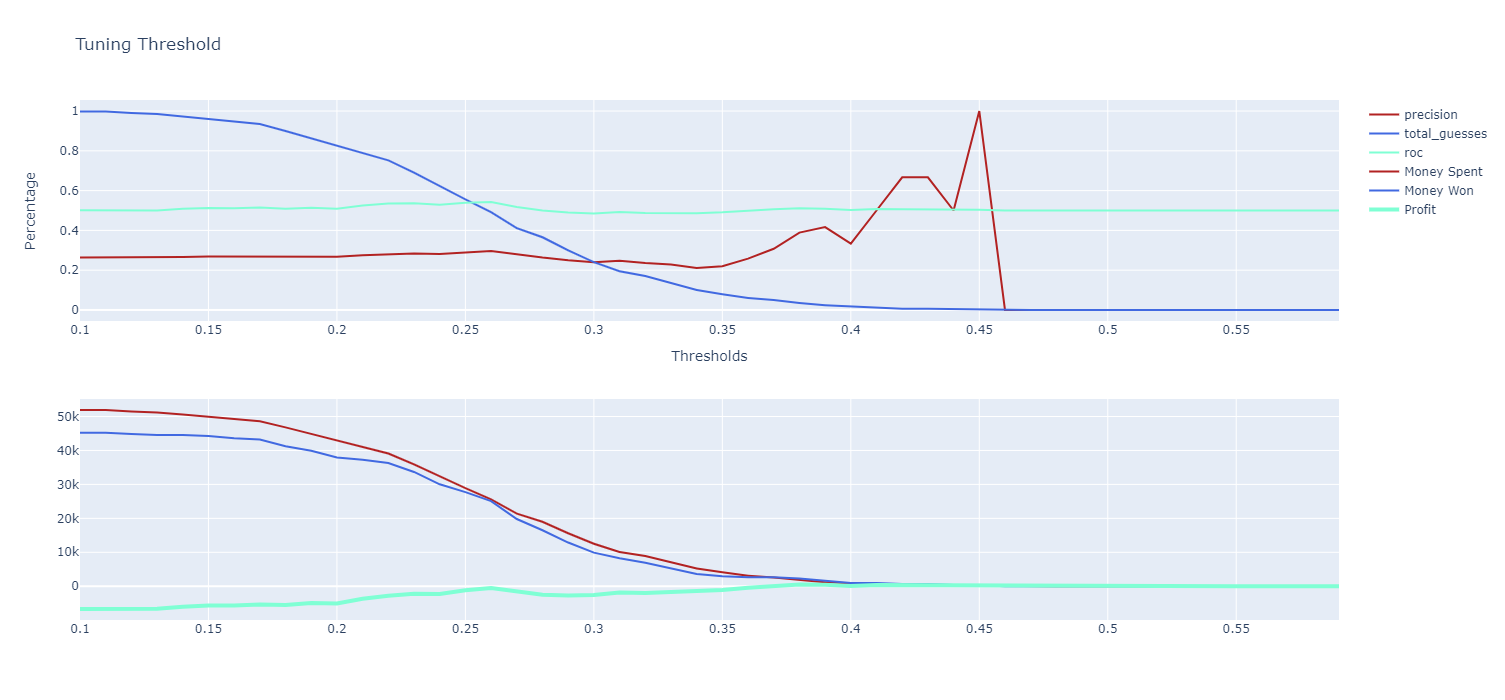

In [80]:
threshold_tuning(rf, X_test, np.arange(0.1, 0.6, 0.01), bet_size=100, odd=3.3)

In [81]:
model = ensemble.RandomForestClassifier()
parameters = {'max_depth':range(2,20,1),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_samples':[0.1,0.2,0.3,0.4,0.5],
              'n_estimators':range(10,2000,100)
             }

cls = RandomizedSearchCV(model, parameters, scoring='precision', cv=5, n_iter=200, n_jobs=-1)
cls.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4,
                                                        0.5],
                                        'n_estimators': range(10, 2000, 100)},
                   scoring='precision')

In [82]:
cls.best_score_

0.36666666666666664

In [83]:
cls.best_params_

{'n_estimators': 210,
 'max_samples': 0.5,
 'max_features': 'auto',
 'max_depth': 16}

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ca

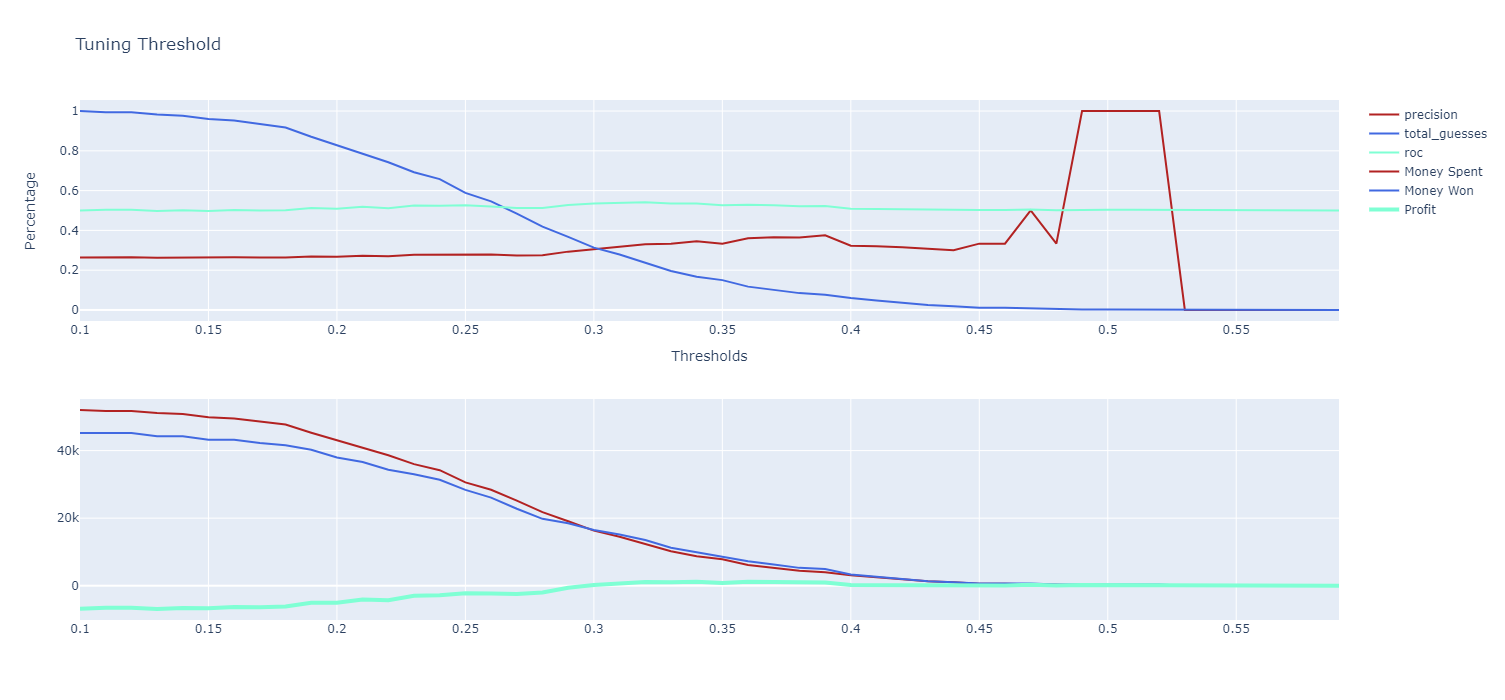

In [84]:
threshold_tuning(cls.best_estimator_, X_test, np.arange(0.1, 0.6, 0.01), bet_size=100, odd=3.3)

### Logistic Regression

In [85]:
scl = preprocessing.StandardScaler()
lr = LogisticRegression()

clf = pipeline.Pipeline([('scaling', scl), ('model', lr)])

param_grid = {
    'model__penalty':['l1', 'l2', 'none'],
    'model__C':np.arange(0.1, 30, 0.2),
    'model__solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__max_iter':[100, 200]
}

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=200,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


255 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_s

RandomizedSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model', LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__C': array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1...
       19.9, 20.1, 20.3, 20.5, 20.7, 20.9, 21.1, 21.3, 21.5, 21.7, 21.9,
       22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9, 24.1,
       24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1, 26.3,
       26.5, 26.7, 26.9, 27.1, 27.3, 27.5, 27.7, 27.9, 28.1, 28.3, 28.5,
       28.7, 28.9, 29.1, 29.3, 29.5, 29.7, 29.9]),
                                        'model__max_iter': [100, 200],
                       

In [86]:
model.best_score_

0.39101597526595555

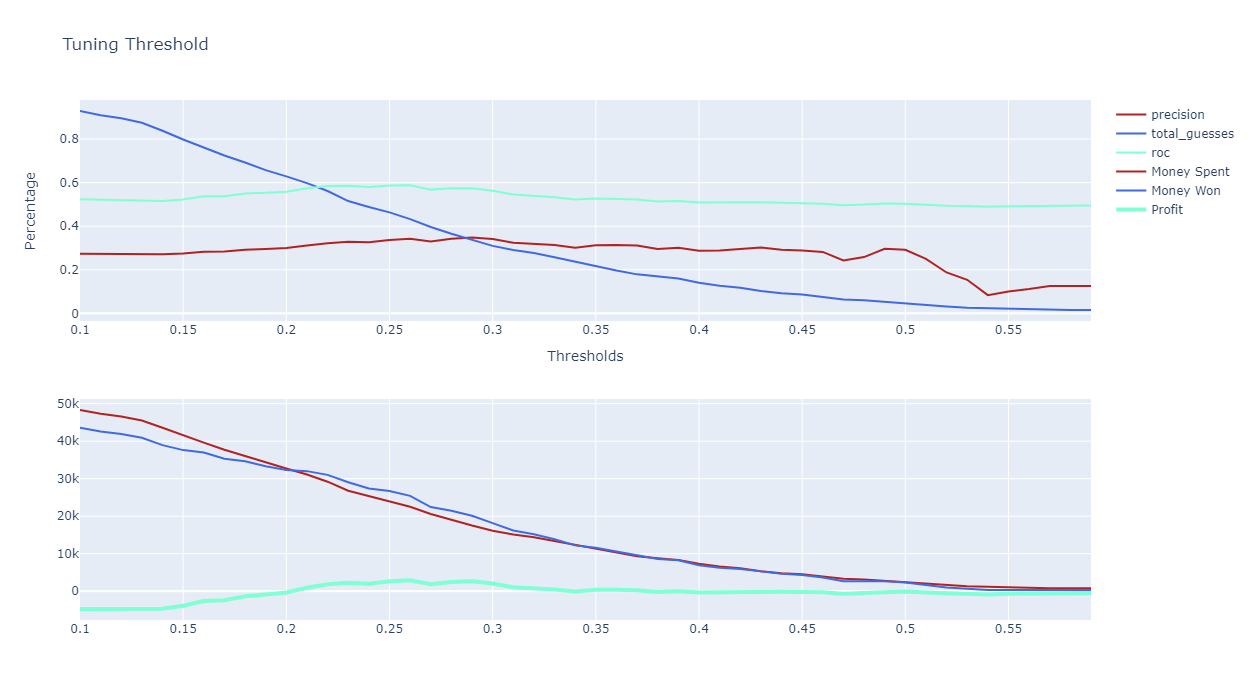

In [89]:
threshold_tuning(model.best_estimator_, X_test, np.arange(0.1, 0.6, 0.01), bet_size=100, odd=3.3)

**Train Win**

In [90]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y_win, test_size=0.2, stratify=y_win)

In [91]:
scl = preprocessing.StandardScaler()
lr = LogisticRegression()

clf = pipeline.Pipeline([('scaling', scl), ('model', lr)])

param_grid = {
    'model__penalty':['l1', 'l2', 'none'],
    'model__C':np.arange(0.1, 30, 0.2),
    'model__solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__max_iter':[100, 200]
}

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=200,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


240 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_so

RandomizedSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model', LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__C': array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1...
       19.9, 20.1, 20.3, 20.5, 20.7, 20.9, 21.1, 21.3, 21.5, 21.7, 21.9,
       22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9, 24.1,
       24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1, 26.3,
       26.5, 26.7, 26.9, 27.1, 27.3, 27.5, 27.7, 27.9, 28.1, 28.3, 28.5,
       28.7, 28.9, 29.1, 29.3, 29.5, 29.7, 29.9]),
                                        'model__max_iter': [100, 200],
                       

In [92]:
model.best_score_

0.5943462638627952

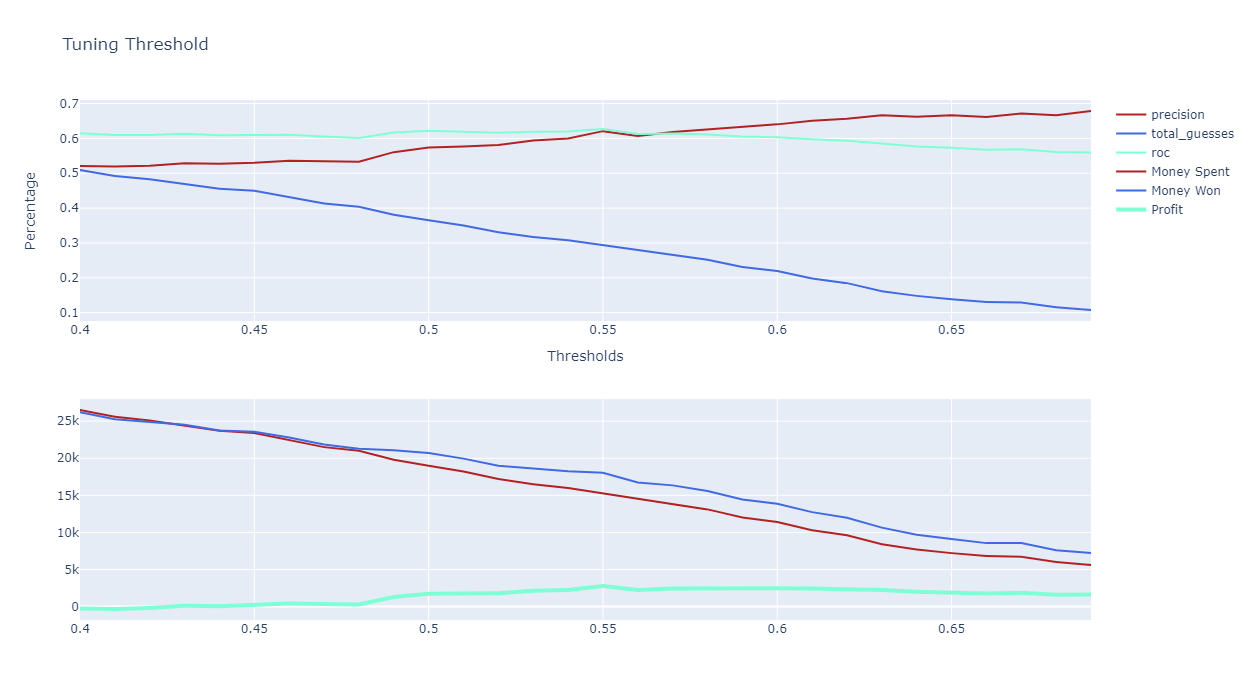

In [103]:
threshold_tuning(model.best_estimator_, X_test, y_test, np.arange(0.4, 0.7, 0.01), bet_size=100, odd=1.9)

**Train Loss**

In [104]:
#Perform train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y_loss, test_size=0.2, stratify=y_loss)

In [105]:
scl = preprocessing.StandardScaler()
lr = LogisticRegression()

clf = pipeline.Pipeline([('scaling', scl), ('model', lr)])

param_grid = {
    'model__penalty':['l1', 'l2', 'none'],
    'model__C':np.arange(0.1, 30, 0.2),
    'model__solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
    'model__max_iter':[100, 200]
}

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=200,
    scoring='precision',
    n_jobs=-1)

model.fit(X_train, y_train)

/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


265 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/caa_user/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_s

RandomizedSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                             ('model', LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__C': array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1...
       19.9, 20.1, 20.3, 20.5, 20.7, 20.9, 21.1, 21.3, 21.5, 21.7, 21.9,
       22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9, 24.1,
       24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1, 26.3,
       26.5, 26.7, 26.9, 27.1, 27.3, 27.5, 27.7, 27.9, 28.1, 28.3, 28.5,
       28.7, 28.9, 29.1, 29.3, 29.5, 29.7, 29.9]),
                                        'model__max_iter': [100, 200],
                       

In [107]:
model.best_score_

0.6058735978312074

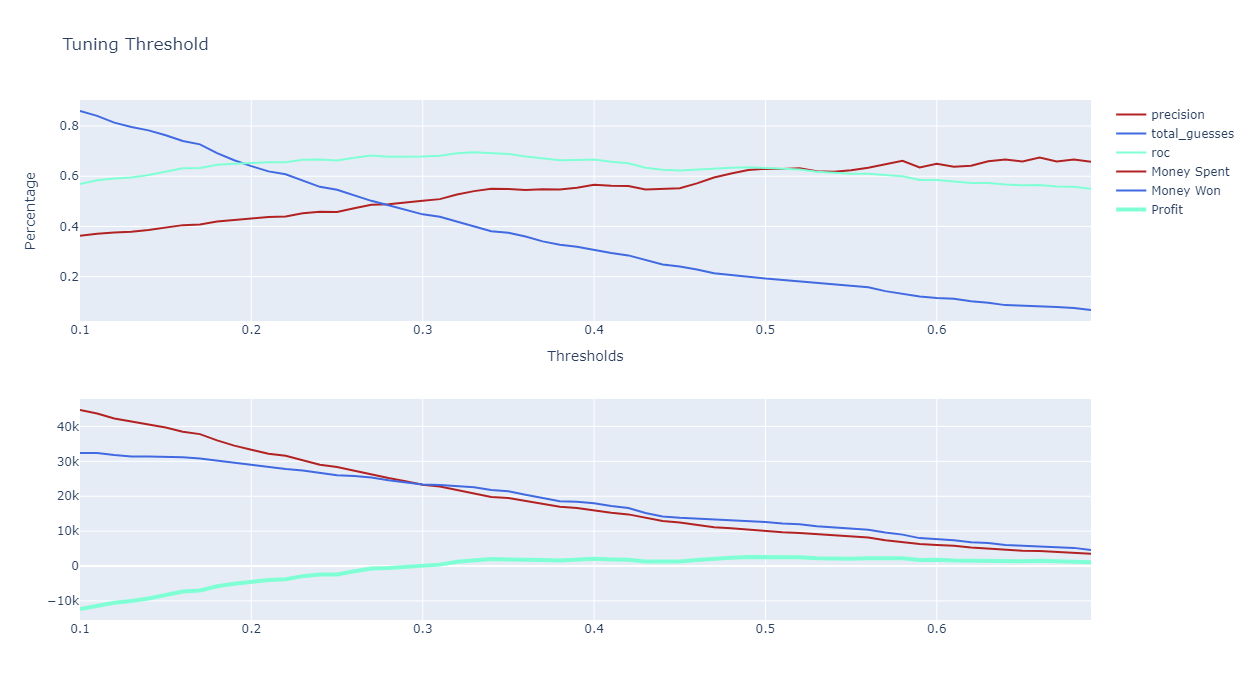

In [112]:
threshold_tuning(model.best_estimator_, X_test, y_test, np.arange(0.1, 0.7, 0.01), bet_size=100, odd=2)